# Machine Learning Project

## Prepared By: Syarafana Begum

## Table of contents

1. [Unsupervised Learning](#Unsupervised-Learning)
    + 1.1 [1. Principal Components Analysis (PCA)](#1.-Principal-Components-Analysis-(PCA))
    + 1.2 [2. K Means Clustering](#2.-K-Means-Clustering)
    + 1.3 [3. Hierarchical Clustering](#3.-Hierarchical-Clustering)
    

    
    
    
2. [Supervised Learning: Regression](#Supervised-Learning:-Regression)
    + 2.1 [1. Linear Regression](#1.-Linear-Regression)
    + 2.2 [2. Gradient Boosting](#2.-Gradient-Boosting)
    + 2.3 [3. Random Forest](#3.-Random-Forest)
    
    
    

3. [Supervised Learning: Classification](#Supervised-Learning:-Classification)
    + 3.1 [1. Logistic Regression](#1.-Logistic-Regression)
    + 3.2 [2. Support Vector Machine](#2.-Support-Vector-Machine)
    + 3.3 [3. K-Nearest Neighbours](#3.-K-Nearest-Neighbours)
    + 3.4 [4. Random Forest](#4.-Random-Forest)

# Introduction
In this project, we aim to exploring real-world datasets and applying various machine learning techniques to address specific research questions. Our analysis will be structured around three main tasks: unsupervised learning, regression, and classification. Through these tasks, we will uncover insights, identify patterns and make predictions based on the data at hand.

## Importing Necessary Libraries
Import various libraries and modules that are necessary for this data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import plotly.express as px
from scipy import stats
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
%matplotlib inline 

# Unsupervised Learning

In the unsupervised learning task, our objective is to identify homogeneous population groups or perform dimension reduction techniques on our chosen datasets. By doing so, we can uncover underlying structures within the data, which can aid in further analysis and interpretation. 
Techniques such as principal component analysis (PCA), k means clustering and hierarchical agglomerative clustering (HAC) will be employed to achieve this task.

Dataset Source: https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2019.csv

### Features
- Overall rank : Rank of the country based on the Happiness Score
- Country or region : Name of the country/region
- Score : A metric measured in 2019 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
- GDP per capita : The extent to which GDP contributed to the calculation of the Happiness Score
- Social support : The extent to which social support contributed to the calculation of the Happiness Score
- Healthy life expectancy : The extent to which healthy life expectancy contributed to the calculation of the Happiness Score
- Freedom to make life choices : The extent to which freedom to make life choices contributed to the calculation of the Happiness Score
- Generosity : The extent to which generosity contributed to the calculation of the Happiness Score
- Perceptions of corruption : The extent to which perceptions of corruption contributed to the calculation of the Happiness Score

## Data Reading and Cleaning
In this section, we will read the customer data from a CSV file and perform initial cleaning steps to ensure the data is suitable for analysis. We will examine the structure of the dataset, identify missing values and address any inconsistencies in the data.

In [2]:
# Read the dataset from CSV file
df=pd.read_csv('/Users/fana/Desktop/SIM_Macbook/DSBA/Year 4/ST3189 (ML)/ST3189 Coursework/happiness.csv')
df.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [3]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (156, 9)


In [4]:
# Display the column names
print("\nColumn names:", df.columns)


Column names: Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [5]:
# Display information about the dataset
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
print("\nDescription: ")
print(df.describe())


Description: 
       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
2

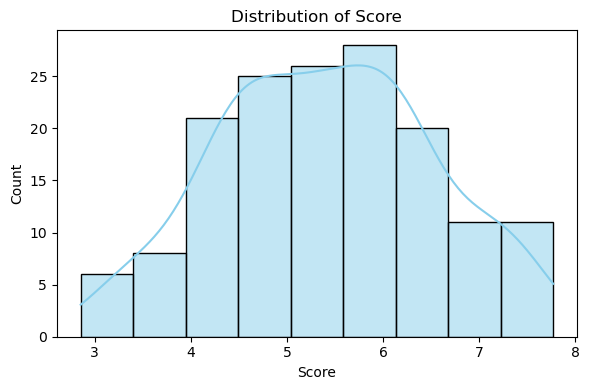

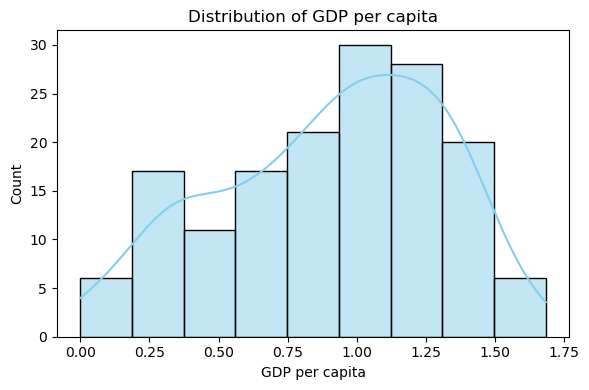

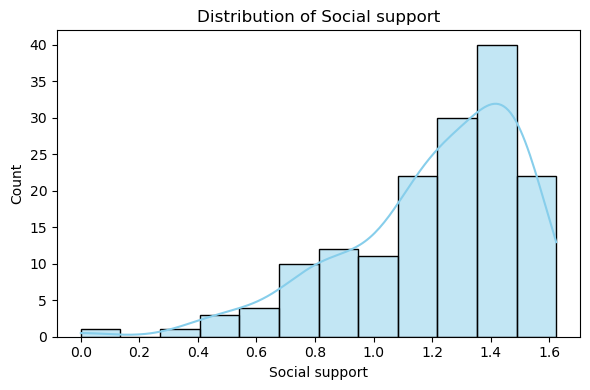

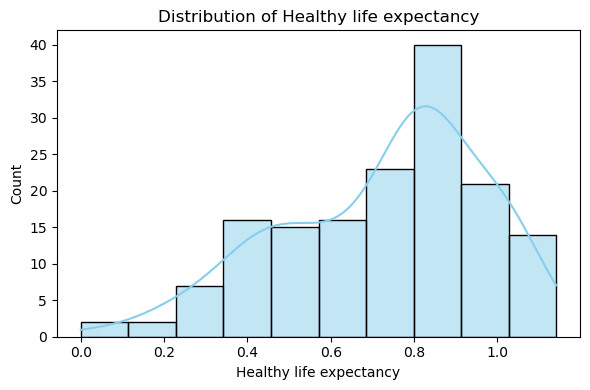

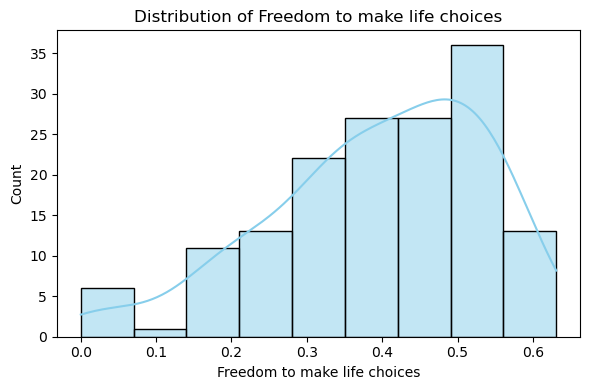

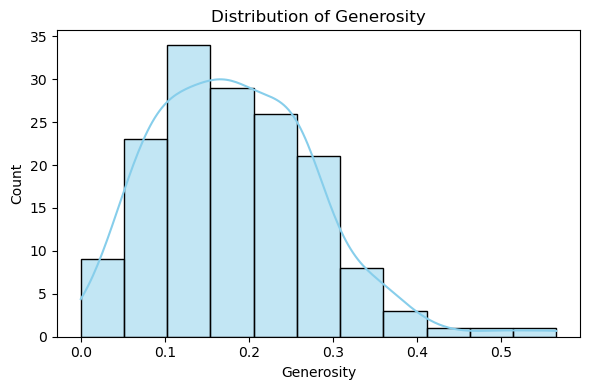

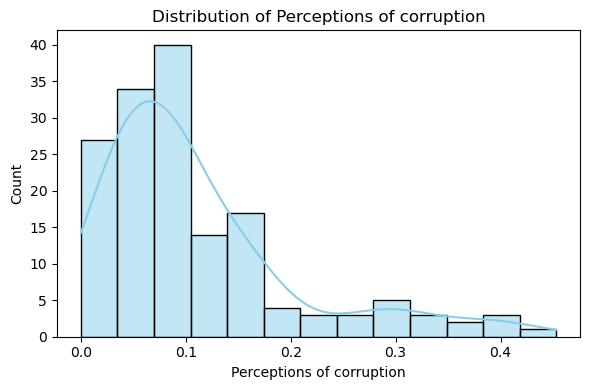

In [7]:
# Define numeric columns
num_cols = [
    'Score', 'GDP per capita', 'Social support',
    'Healthy life expectancy', 'Freedom to make life choices',
    'Generosity', 'Perceptions of corruption'
]

# 1. Plot histogram + density for each numeric column
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

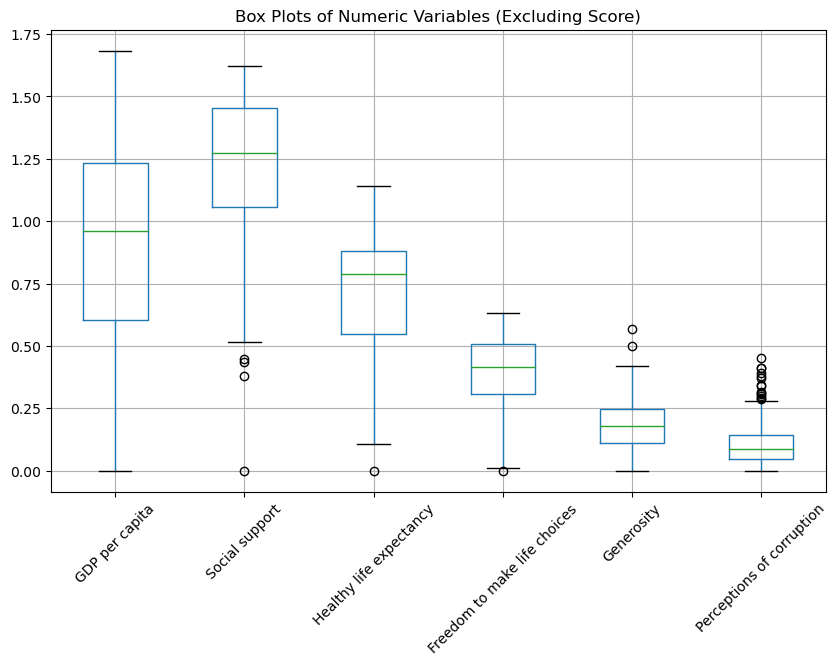

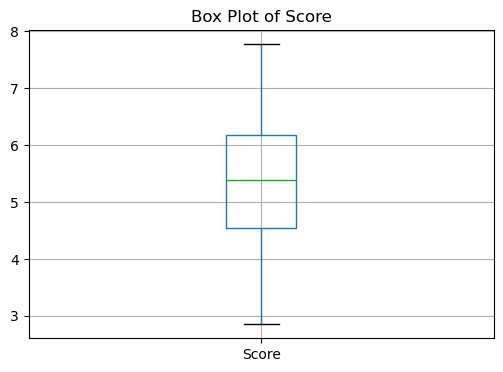

In [8]:
# Separate the 'Score' column from the other numeric columns
score_col = ['Score']
other_numeric_cols = [
    'GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'
]

# Box plot for the numeric columns (excluding 'Score')
plt.figure(figsize=(10, 6))
df[other_numeric_cols].boxplot()
plt.title('Box Plots of Numeric Variables (Excluding Score)')
plt.xticks(rotation=45)
plt.show()

# Box plot for 'Score' on a separate axis
plt.figure(figsize=(6, 4))
df[score_col].boxplot()
plt.title('Box Plot of Score')
plt.show()

### Analysis
- The data’s descriptive statistics generally suggest a positively skewed distribution, as mean values exceed medians, indicating a tail towards higher values.
- The wider interquartile range (IQR) in the upper quartile implies a greater concentration of data toward the lower end, which is typical of positively skewed distributions.
- Outliers, evident by values beyond Q1 − 1.5 * IQR or Q3 + 1.5 * IQR, are identified by their deviation from the typical spread, often represented by larger values like the maximum observed in the dataset.
- Consideration of outliers is crucial for accurate analysis.

In [9]:
# Check for missing values
print("NULL VALUES: ", df.isnull().sum(), '\n'*2)

# Check for duplicate values
print("DUPLICATES VALUES: ", df.duplicated().sum())

NULL VALUES:  Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64 


DUPLICATES VALUES:  0


There are no null values and duplicates. 

## Descriptive Data Analysis
In this section, we perform descriptive data analysis for the unsupervised learning task. After removing the 'overall rank', 'country or region' and 'score' columns, we visualise the correlation matrix to uncover relationships between socio-economic indicators. We also generate a pairplot to examine pairwise relationships and distribution plots to assess the distributions of individual variables. These insights inform subsequent unsupervised learning techniques, guiding further exploration and interpretation of the dataset.

In [10]:
print(df.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [11]:
# Dropping the 'overall rank', 'country or region', and 'score' columns from the dataframe
df_new = df.drop(['Overall rank', 'Country or region', 'Score'], axis=1)

# Displaying the first few rows of the modified dataframe
df_new.head()

GDP per capita  Social support  Healthy life expectancy  \
0           1.340           1.587                    0.986   
1           1.383           1.573                    0.996   
2           1.488           1.582                    1.028   
3           1.380           1.624                    1.026   
4           1.396           1.522                    0.999   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                         0.596       0.153                      0.393  
1                         0.592       0.252                      0.410  
2                         0.603       0.271                      0.341  
3                         0.591       0.354                      0.118  
4                         0.557       0.322                      0.298

Text(0.5, 1.0, 'Correlation Matrix')

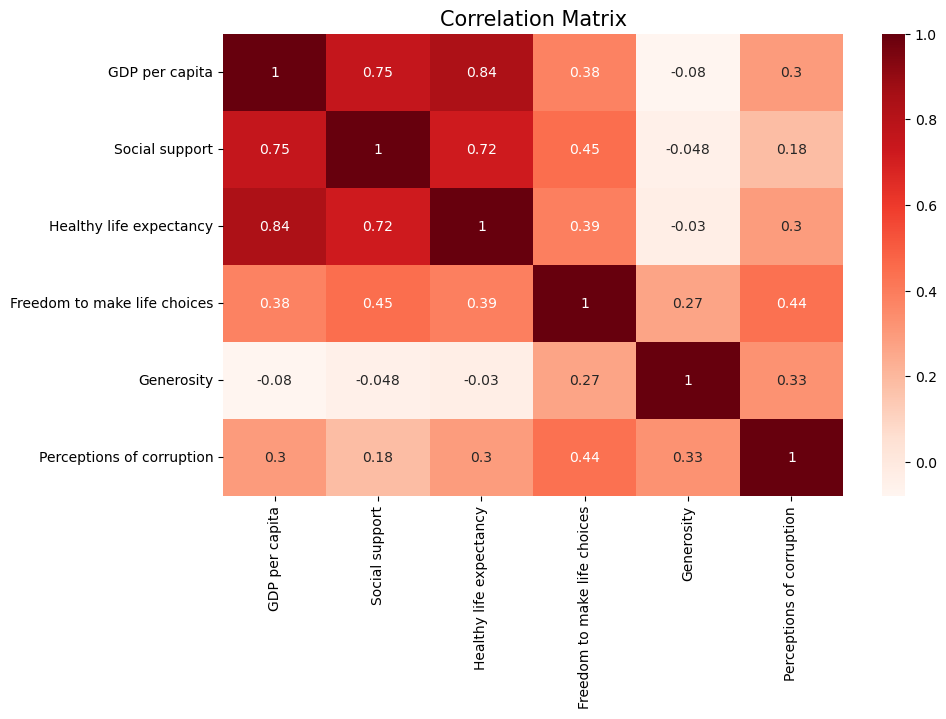

In [12]:
# Generating a heatmap of the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(), annot=True, cmap='Reds')
plt.title("Correlation Matrix", fontsize='15')

<Figure size 1500x800 with 0 Axes>

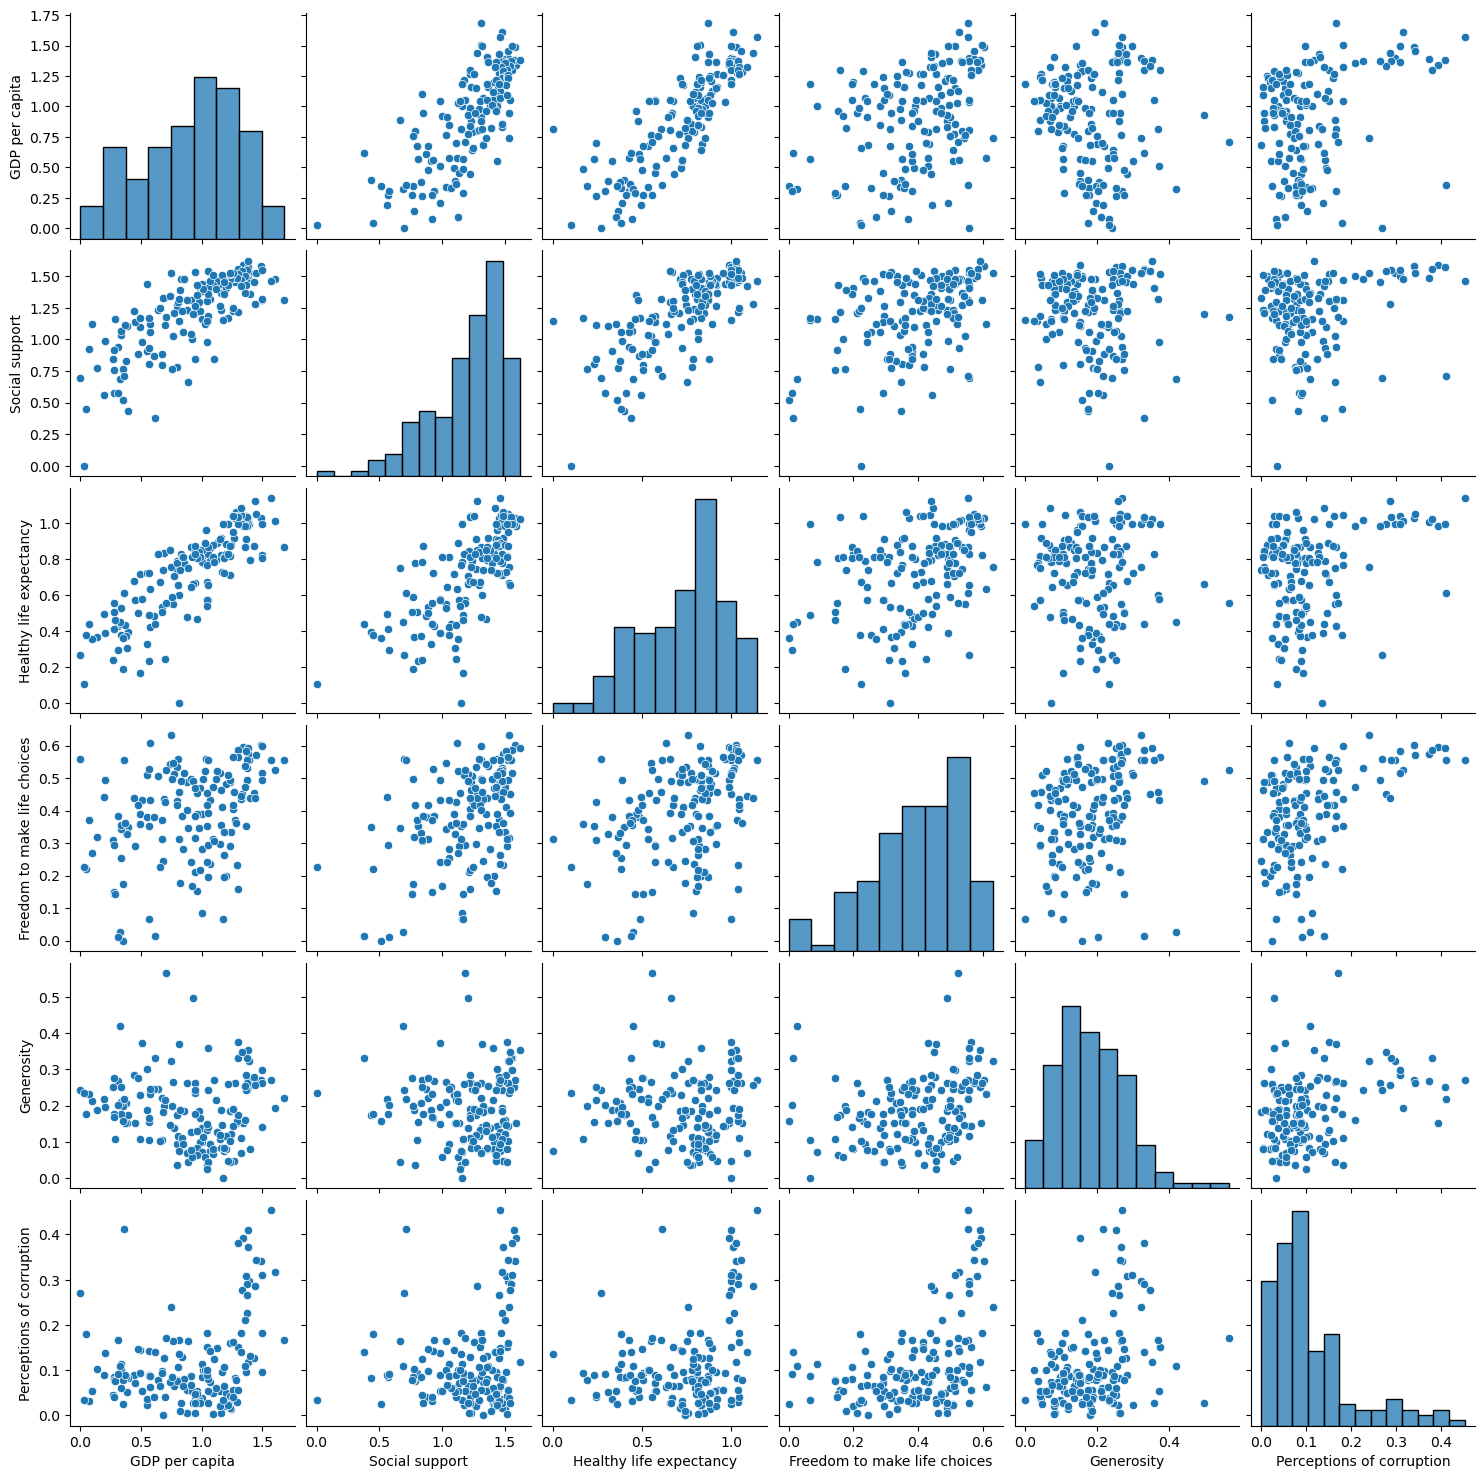

In [13]:
# Generating a pairplot for visualisation of relationships between variables
plt.figure(figsize=(15,8))
sns.pairplot(df_new)

### Analysis of correlations:
- Significant positive correlations are observed between GDP per capita and Healthy life expectancy, GDP per capita and Social support, as well as Healthy life expectancy and Social support.
- Slight negative correlations are observed between Generosity and GDP per capita, Generosity and Social support, as well as Generosity and Healthy life expectancy.

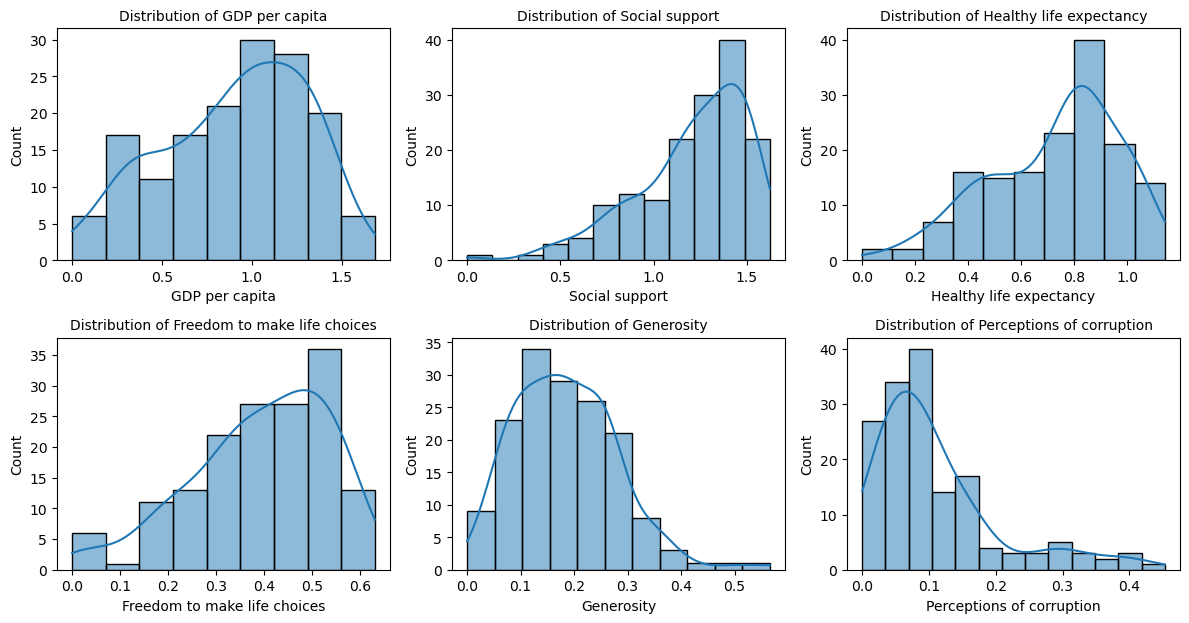

In [15]:
# Create a grid of 3 rows x 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop over each column in df_new
for i, col in enumerate(df_new.columns):
    # Plot a histogram with a KDE (kernel density estimate)
    sns.histplot(data=df_new, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=10)

# Hide remaining empty subplots if the DataFrame has fewer than 9 columns
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Data Scaling
To standardise the data distribution with a mean of 0 and standard deviation of 1, we employ the Standard Scaler transformation.

In [16]:
# Applying Standard Scaler transformation
ss=StandardScaler()
scaled_df_new=ss.fit_transform(df_new)
df_new_scaled=pd.DataFrame(scaled_df_new, columns=df_new.columns)

In [17]:
# Print the shape of the dataframe
print('df_scaled.shape : ',df_new_scaled.shape)
# Displaying the first few rows of the scaled dataframe
df_new_scaled

df_scaled.shape :  (156, 6)


GDP per capita  Social support  Healthy life expectancy  \
0          1.095042        1.268098                 1.080422   
1          1.203324        1.221154                 1.121857   
2          1.467734        1.251332                 1.254446   
3          1.195769        1.392163                 1.246159   
4          1.236060        1.050146                 1.134287   
..              ...             ...                      ...   
151       -1.375303       -1.669224                -0.460929   
152       -1.080675       -1.085783                -0.937421   
153       -1.397967       -2.319726                -1.509213   
154       -2.213861       -4.053282                -2.569928   
155       -1.508767       -2.125246                -1.782678   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                        1.424282   -0.335404                   2.996757  
1                        1.396277    0.707265                   3.177158  
2                        1.473292    0.907373                   2.444941  
3                        1.389276    1.781530                   0.078500  
4                        1.151229    1.444506                   1.988632  
..                            ...         ...                        ...  
151                      1.137227    0.338645                   3.187770  
152                      0.171040    0.960033                   0.386244  
153                     -2.748526   -0.282744                  -0.908401  
154                     -1.173221    0.528221                  -0.802283  
155                     -2.678512    0.180664                  -0.208019  

[156 rows x 6 columns]

This process ensures that all features are on the same scale, facilitating comparison and interpretation in subsequent analyses.

## 1. Principal Components Analysis (PCA)
In this section, we perform Principal Components Analysis (PCA) to reduce the dimensionality of the dataset while retaining most of the variance. The cumulative explained variance is evaluated for different numbers of components to determine the optimal number of principal components.

In [24]:
# Initialize a list to store PCA results
pca_list=list()

#Duplicate Dataframe
pca_df_new_scaled = df_new_scaled

# Iterate through different numbers of components
for n in range(2, 6):
    # Perform PCA
    df_new_pca=PCA(n_components=n) 
    df_new_pca.fit(pca_df_new_scaled)
    # Store results in the list
    pca_list.append(pd.Series({'n':n, 'model':df_new_pca, 'var': df_new_pca.explained_variance_ratio_.sum()}))
    
# Concatenate the results into a DataFrame
df_new_pca_var=pd.concat(pca_list, axis=1).T.set_index('n')
# Display the cumulative explained variance for each number of components
df_new_pca_var

model       var
n                               
2  PCA(n_components=2)  0.735866
3  PCA(n_components=3)  0.837508
4  PCA(n_components=4)   0.93022
5  PCA(n_components=5)  0.973774

In [27]:
explained_ratio = np.cumsum(np.round(df_new_pca.explained_variance_ratio_,2))

Text(0.5, 1.0, 'Scree Plot: Cumulative Explained Variance to PCs')

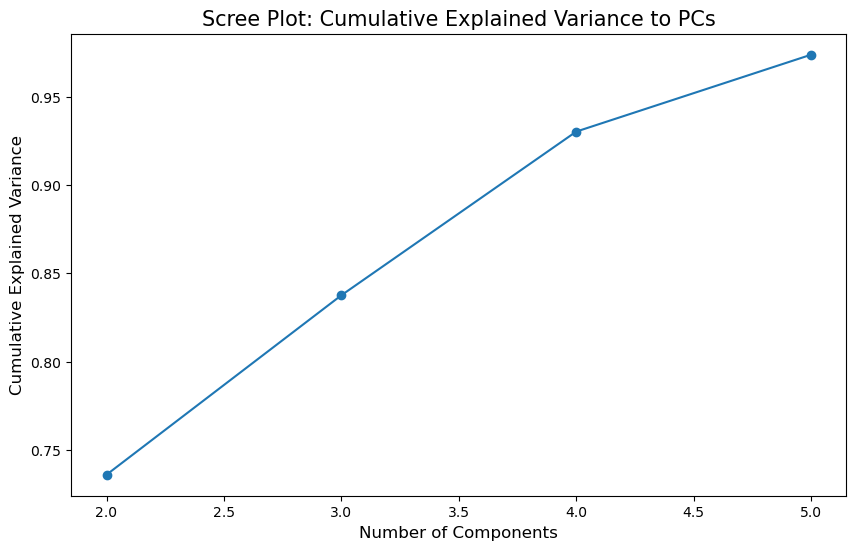

In [29]:
# Plot the scree plot to visualize cumulative explained variance
plt.figure(figsize=(10,6))
plt.plot(range(2,6), df_new_pca_var['var'], marker='o') 
plt.xlabel('Number of Components', fontsize='12')
plt.ylabel('Cumulative Explained Variance', fontsize='12') 
plt.title('Scree Plot: Cumulative Explained Variance to PCs', fontsize='15')

Based on the scree plot, we choose 4 components as they explain up to 93% of the data.

In [30]:
# Define the number of components
n_components=4

# Perform PCA with the chosen number of components
pca=PCA(n_components=n_components).fit(pca_df_new_scaled)
df_new_scaled_pca=pca.fit_transform(pca_df_new_scaled)

# store it in a new data frame
new_data= pd.DataFrame(data = df_new_scaled_pca, columns = ['pc 1', 'pc 2','pc 3','pc 4'])

new_data

pc 1      pc 2      pc 3      pc 4
0   -3.134226  1.053542 -1.923436 -0.292394
1   -3.292053  1.836057 -1.471747  0.238936
2   -3.338247  1.537896 -0.788607  0.230770
3   -2.592776  0.945854  1.538589  0.175867
4   -2.835104  1.685571 -0.225374  0.561250
..        ...       ...       ...       ...
151  0.378692  3.023072 -2.521027 -0.575559
152  1.332517  1.587694 -0.019386 -0.117757
153  3.957017 -0.505351 -0.467332  1.346695
154  5.089682  1.437319 -0.387760  0.050380
155  3.799670  0.231178 -0.668057  1.492102

[156 rows x 4 columns]

In [31]:
pd.DataFrame(pca.components_.T, columns=['PC_' +str(i) for i in range(1,5)],index=df_new.columns)

PC_1      PC_2      PC_3      PC_4
GDP per capita               -0.514595 -0.227818 -0.023809  0.240402
Social support               -0.490649 -0.220284  0.281420 -0.063313
Healthy life expectancy      -0.510567 -0.192272  0.028086  0.274806
Freedom to make life choices -0.380958  0.352122  0.118550 -0.810425
Generosity                   -0.059484  0.693507  0.580817  0.418915
Perceptions of corruption    -0.291737  0.507606 -0.753687  0.174361

#### Observations: 
- Based on the PCA conducted, PC1 represents “quality of life” as it is heavily loaded to GDP per capita, Social support and Healthy life expectancy. PC2 represents “social capital” as it is heavily loaded onto Freedom to make life choices, Generosity and Perceptions of corruption. PC3 represents “trust and freedom” since Perceptions of corruption, Generosity and Social support load heavily on PC3. PC4 represents “personal freedom” as Freedom to make life choices is most heavily loaded on PC4.

In [32]:
# Factor Analysis : variance explained by each component- 
print("Variance explained by each component ")
pd.Series(pca.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(1,5)])

Variance explained by each component 


PC_1    0.498265
PC_2    0.237601
PC_3    0.101642
PC_4    0.092712
dtype: float64

## 2. K Means Clustering
In this section, we apply K Means Clustering to identify homogeneous groups within the dataset.

### Finding the Optimal Number of Clusters
To determine the optimal number of clusters, we utilise the elbow method. We iterate through different numbers of clusters and calculate the sum of squared errors (inertia). The scree plot helps visualise the inertia values against the number of clusters, aiding in identifying the optimal number.

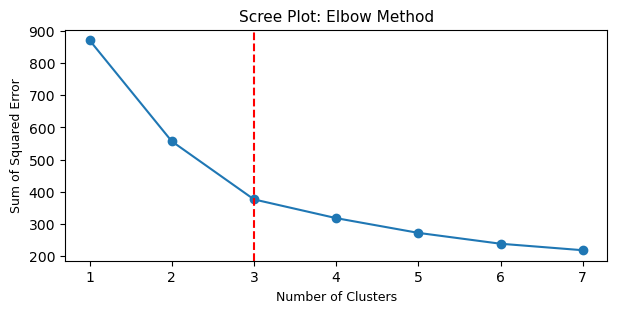

In [39]:
inertia=[]
K=range(1,8)

for i in K:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(df_new_scaled_pca)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(7,3))   
plt.plot(K, inertia, marker='o')
plt.title('Scree Plot: Elbow Method', fontsize='11')
plt.xlabel('Number of Clusters', fontsize='9')
plt.ylabel('Sum of Squared Error', fontsize='9')
plt.axvline(x=3, color='red', linestyle='--')
plt.show()

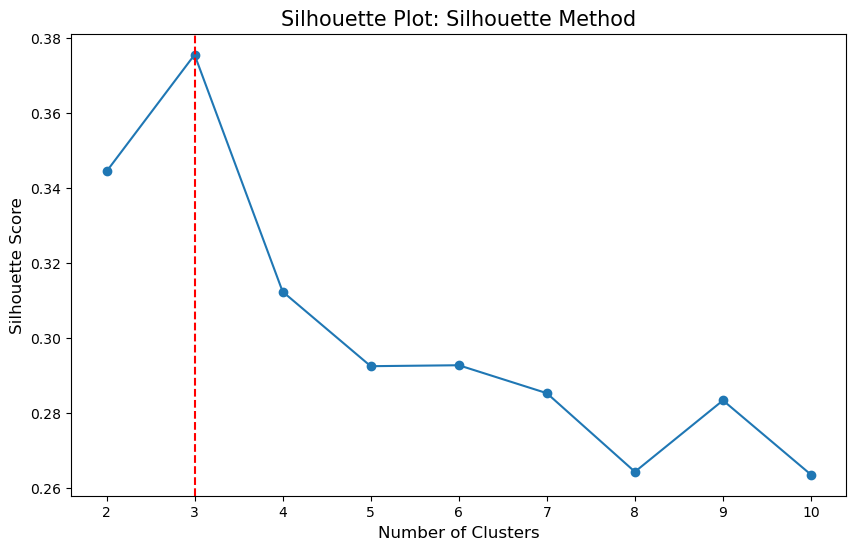

In [41]:
silhouette_scores = []
K = range(2, 11) 

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_new_scaled_pca)
    silhouette_scores.append(silhouette_score(df_new_scaled_pca, kmeans.labels_))

plt.figure(figsize=(10, 6))   
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Plot: Silhouette Method', fontsize=15)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.axvline(x=3, color='red', linestyle='--')
plt.show()

Based on both plots, the optimal number of clusters is determined to be 3.

### K Means Clustering and Analysis
Next, we perform KMeans clustering with 3 clusters and visualise the results using boxplots for selected features.

In [42]:
# Perform KMeans clustering with 3 clusters
kmeans=KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit_predict(df_new_scaled_pca)
kmeans_label=kmeans.labels_

In [43]:
# Add cluster labels to the original dataframe
kmeans_df=pd.DataFrame(df)
kmeans_df['kclusters']=kmeans_label
kmeans_df.head(5)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  kclusters  
0                      0.393          2  
1                      0.410          2  
2                      0.341          2  
3                      0.118          2  
4                      0.298          2

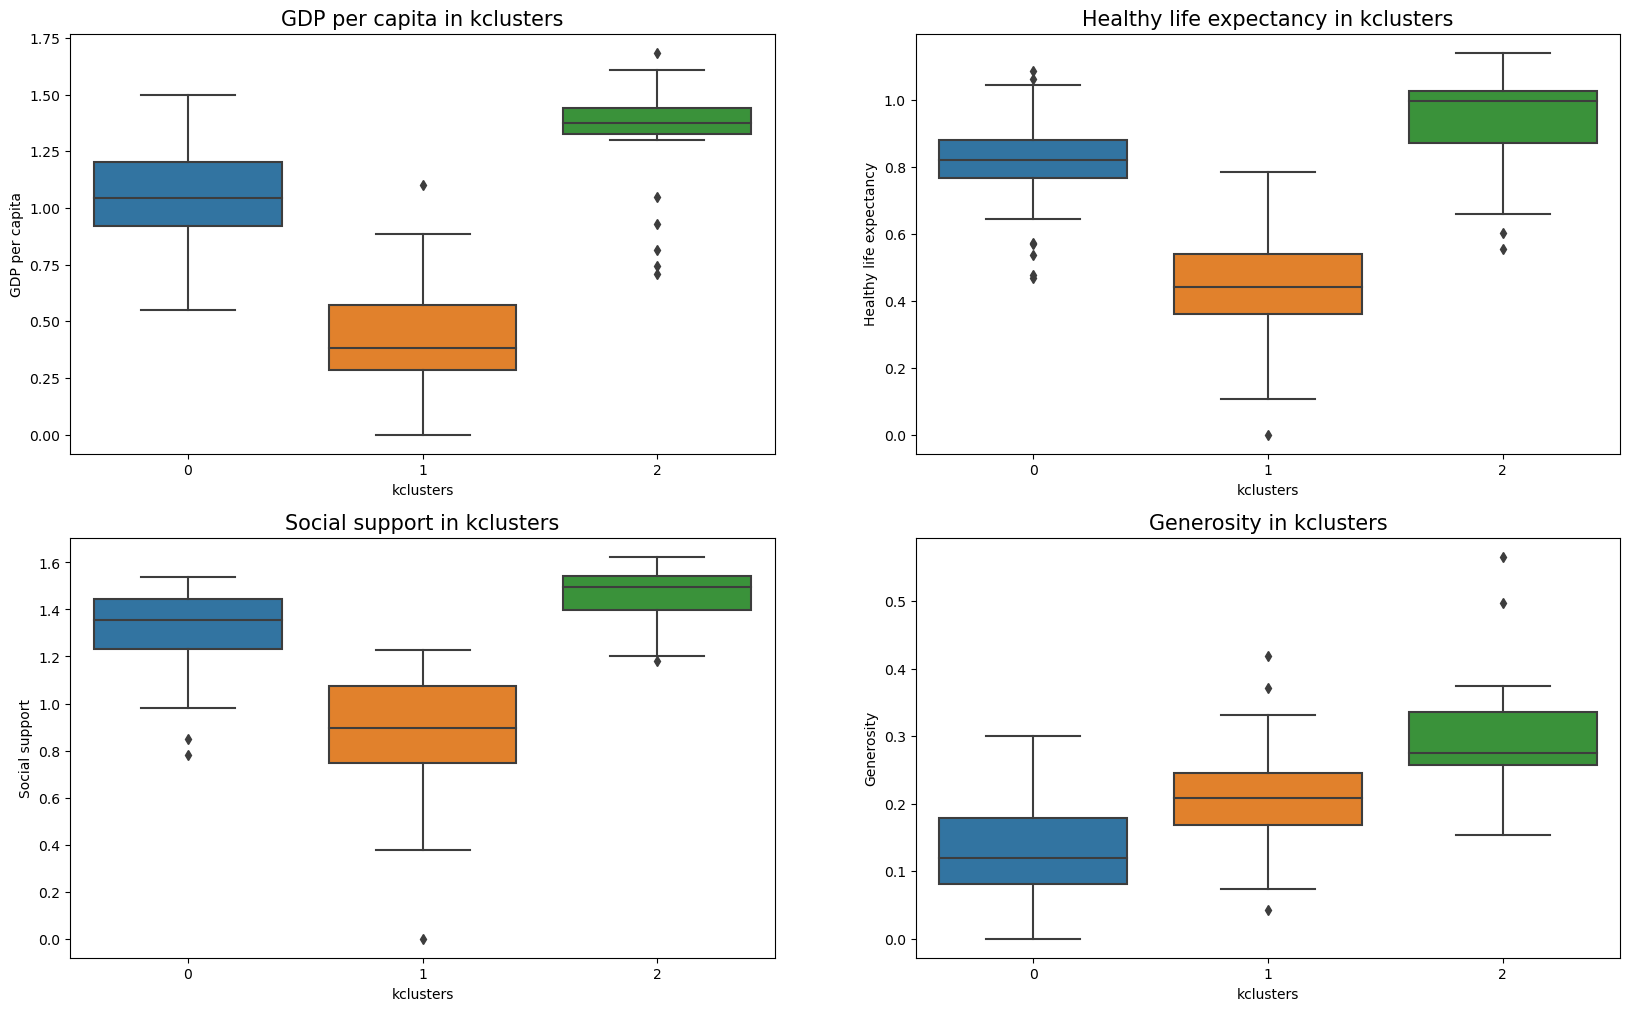

In [46]:
# Visualize boxplots for selected features by cluster
fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(20,12))

plt.subplot(2, 2, 1)
ax = sns.boxplot(x='kclusters', y='GDP per capita', data=kmeans_df)
plt.title('GDP per capita in kclusters', fontsize='15')

plt.subplot(2, 2, 2)
ax=sns.boxplot(x='kclusters', y='Healthy life expectancy', data=kmeans_df)
plt.title('Healthy life expectancy in kclusters', fontsize='15')

plt.subplot(2, 2, 3)
ax = sns.boxplot(x='kclusters', y='Social support', data=kmeans_df)
plt.title('Social support in kclusters', fontsize='15')

plt.subplot(2, 2, 4)
ax = sns.boxplot(x='kclusters', y='Generosity', data=kmeans_df)
plt.title('Generosity in kclusters', fontsize='15')


plt.show()

### Analysis 
- Cluster 2 has the highest GDP per capita followed by cluster 0 and cluster 1 has the lowest GDP per capita.
- Cluster 2 has the highest healthy life expectancy followed by cluster 0 and cluster 1 has the lowest healthy life expectancy.
- Cluster 2 has the highest social support followed by cluster 0 and cluster 1 has the lowest social support.
- Cluster 2 has the highest generosity followed by cluster 1 and cluster 0 has the lowest generosity.

Cluster 2 represents developed countries, Cluster 1 denotes underdeveloped countries, and Cluster 0 portrays developing countries.

In [52]:
kclusters_0=kmeans_df.loc[kmeans_df['kclusters']==0]
# list of countries in this cluster
kclusters_0['Country or region'].unique()

array(['Costa Rica', 'Israel', 'Czech Republic', 'Mexico', 'France',
       'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Spain', 'Panama',
       'Brazil', 'Uruguay', 'El Salvador', 'Italy', 'Slovakia',
       'Trinidad & Tobago', 'Poland', 'Lithuania', 'Colombia', 'Slovenia',
       'Nicaragua', 'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador',
       'Kuwait', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Croatia', 'Dominican Republic',
       'Bosnia and Herzegovina', 'Turkey', 'Malaysia', 'Belarus',
       'Greece', 'Mongolia', 'North Macedonia', 'Kyrgyzstan',
       'Turkmenistan', 'Algeria', 'Morocco', 'Azerbaijan', 'Lebanon',
       'China', 'Vietnam', 'Bulgaria', 'Jordan', 'Gabon', 'South Africa',
       'Albania', 'Venezuela', 'Palestinian Territories'

In [53]:
kclusters_1=kmeans_df.loc[kmeans_df['kclusters']==1]
# list of countries in this cluster
kclusters_1['Country or region'].unique()

array(['Pakistan', 'Tajikistan', 'Nigeria', 'Cameroon', 'Ghana',
       'Ivory Coast', 'Nepal', 'Benin', 'Congo (Brazzaville)', 'Laos',
       'Cambodia', 'Senegal', 'Somalia', 'Niger', 'Burkina Faso', 'Iran',
       'Guinea', 'Georgia', 'Gambia', 'Kenya', 'Mauritania', 'Mozambique',
       'Bangladesh', 'Congo (Kinshasa)', 'Mali', 'Sierra Leone', 'Chad',
       'Ethiopia', 'Swaziland', 'Uganda', 'Zambia', 'Togo', 'India',
       'Liberia', 'Comoros', 'Madagascar', 'Lesotho', 'Burundi',
       'Zimbabwe', 'Haiti', 'Syria', 'Malawi', 'Yemen', 'Rwanda',
       'Tanzania', 'Afghanistan', 'Central African Republic',
       'South Sudan'], dtype=object)

In [54]:
kclusters_2=kmeans_df.loc[kmeans_df['kclusters']==2]
# list of countries in this cluster
kclusters_2['Country or region'].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Luxembourg', 'United Kingdom', 'Ireland', 'Germany',
       'Belgium', 'United States', 'United Arab Emirates', 'Malta',
       'Qatar', 'Singapore', 'Bahrain', 'Uzbekistan', 'Thailand',
       'Hong Kong', 'Indonesia', 'Bhutan', 'Myanmar'], dtype=object)

In [66]:
print("Number of undeveloped countries: ", len(kclusters_1))
print("Number of developing countries: ", len(kclusters_0))
print("Number of developed countries: ", len(kclusters_2))

Number of undeveloped countries:  48
Number of developing countries:  80
Number of developed countries:  28


In [56]:
fig = px.choropleth(kmeans_df, 
                    locations = 'Country or region',  # country column 
                    locationmode = 'country names', 
                    color = 'kclusters',      # cluster labels are in the'cluster' column
                    color_continuous_scale = 'Viridis',  
                    title = 'World Map With Clusters (K Means Clustering)')

fig.show()

### Analysis
- Cluster 2, representing the developed countries, primarily spans North America, Europe, Oceania, with a minor presence in Asia.

- Cluster 1, comprising the undeveloped countries, is predominantly situated across Africa and Asia.

- Cluster 0 encompasses developing countries, located in South America, Europe, Asia, and Africa.

- Uncolored regions on the map signify the absence of available data.

## 3. Hierarchical Clustering 
In this section, we apply Hierarchical Agglomerative Clustering (HAC) to group countries based on their socio-economic indicators.

### Dendrogram Analysis
We begin by constructing a dendrogram using Ward's method to visualise the hierarchical clustering process.

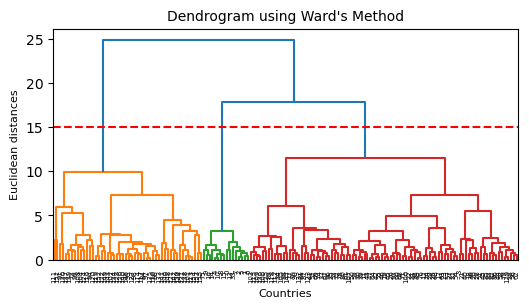

In [88]:
plt.figure(figsize=(6,3))

dendrogram=sch.dendrogram(sch.linkage(df_new_scaled_pca, method='ward'))

plt.axhline(15, color='red', linestyle='--')
plt.title("Dendrogram using Ward's Method", fontsize='10')
plt.xlabel('Countries', fontsize='8')
plt.ylabel('Euclidean distances', fontsize='8')

plt.show()

We can see that there are three main clusters at 18 Euclidean distance.

### HAC Clustering and Analysis
Next, we perform Agglomerative Clustering with 3 clusters and visualise the results using boxplots for selected features.

In [89]:
# Perform Agglomerative Clustering with 3 clusters
hclusters=AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hclusters.fit_predict(df_new_scaled_pca)
hclusters_label=hclusters.labels_

In [90]:
# Add cluster labels to the original dataframe
hclusters_df=pd.DataFrame(df)
hclusters_df['hclusters']=hclusters_label
hclusters_df.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  kclusters  hclusters  
0                      0.393          2          2  
1                      0.410          2          2  
2                      0.341          2          2  
3                      0.118          2          0  
4                      0.298          2          2

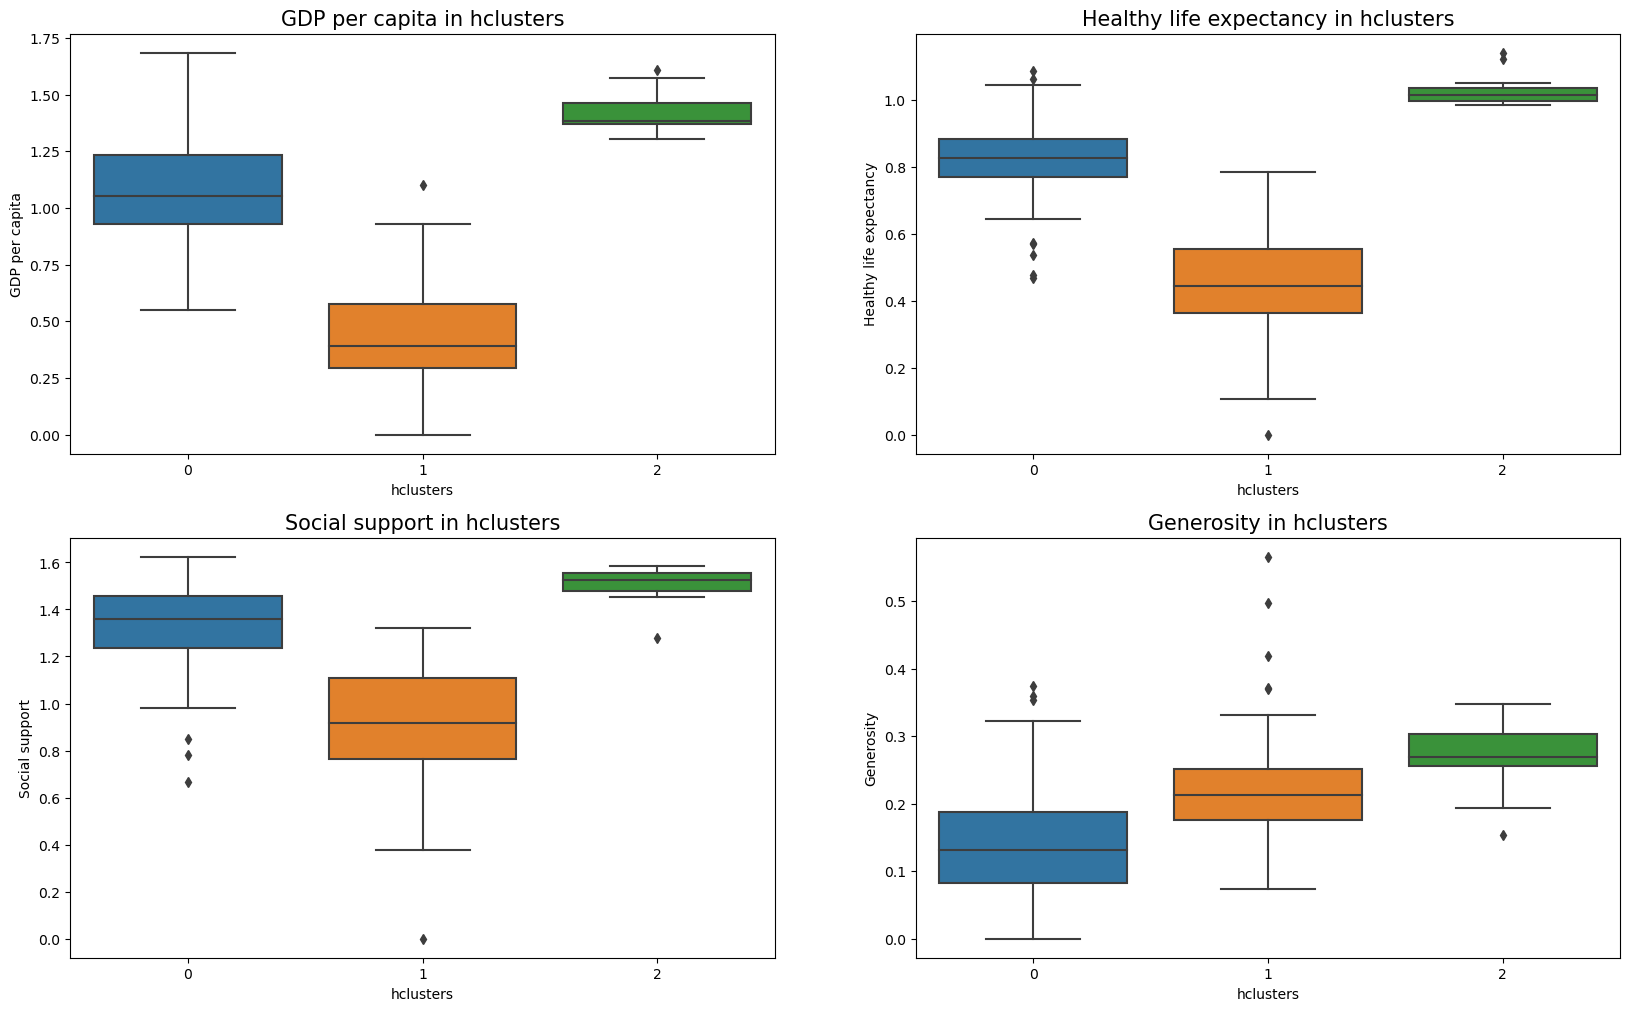

In [91]:
# Visualize boxplots for selected features by cluster
fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(20,12))

plt.subplot(2, 2, 1)
sns.boxplot(x='hclusters', y='GDP per capita', data=hclusters_df)
plt.title('GDP per capita in hclusters', fontsize='15')

plt.subplot(2, 2, 2)
sns.boxplot(x='hclusters', y='Healthy life expectancy', data=hclusters_df)
plt.title('Healthy life expectancy in hclusters', fontsize='15')

plt.subplot(2, 2, 3)
ax = sns.boxplot(x='hclusters', y='Social support', data=hclusters_df)
plt.title('Social support in hclusters', fontsize='15')

plt.subplot(2, 2, 4)
ax = sns.boxplot(x='hclusters', y='Generosity', data=hclusters_df)
plt.title('Generosity in hclusters', fontsize='15')

plt.show()

### Analysis 
- Cluster 2 has the highest GDP per capita followed by cluster 0 and cluster 1 has the lowest GDP per capita.
- Cluster 2 has the highest healthy life expectancy followed by cluster 0 and cluster 1 has the lowest healthy life expectancy.
- Cluster 2 has the highest social support followed by cluster 0 and cluster 1 has the lowest social support.
- Cluster 2 has the highest generosity followed by cluster 1 and cluster 0 has the lowest generosity.

Cluster 2 represents developed countries, Cluster 1 denotes underdeveloped countries, and Cluster 0 portrays developing countries.

Lastly, we examine the distribution of countries within each cluster and visualise them on a choropleth map.

In [101]:
hclusters_0 = hclusters_df.loc[hclusters_df['hclusters'] == 0]
# list of countries in this cluster
hclusters_0['Country or region'].unique()

array(['Iceland', 'Costa Rica', 'Israel', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'El Salvador', 'Italy',
       'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland', 'Uzbekistan',
       'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua', 'Kosovo',
       'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait', 'Thailand',
       'Latvia', 'South Korea', 'Estonia', 'Jamaica', 'Mauritius',
       'Japan', 'Honduras', 'Kazakhstan', 'Bolivia', 'Hungary',
       'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal', 'Russia',
       'Philippines', 'Serbia', 'Moldova', 'Libya', 'Montenegro',
       'Croatia', 'Dominican Republic', 'Bosnia and Herzegovina',
       'Turkey', 'Malaysia', 'Belarus', 'Greece', 'Mongolia',
       'North Macedonia', 'Kyrgyzstan', 'Turkmenistan', 'Algeria',
       'Morocco', 'Azerbaijan', 'Lebanon'

In [102]:
hclusters_1 = hclusters_df.loc[hclusters_df['hclusters'] == 1]
# list of countries in this cluster
hclusters_1['Country or region'].unique()

array(['Pakistan', 'Tajikistan', 'Nigeria', 'Indonesia', 'Bhutan',
       'Cameroon', 'Ghana', 'Ivory Coast', 'Nepal', 'Benin',
       'Congo (Brazzaville)', 'Laos', 'Cambodia', 'Senegal', 'Somalia',
       'Niger', 'Burkina Faso', 'Iran', 'Guinea', 'Gambia', 'Kenya',
       'Mauritania', 'Mozambique', 'Bangladesh', 'Congo (Kinshasa)',
       'Mali', 'Sierra Leone', 'Myanmar', 'Chad', 'Ethiopia', 'Swaziland',
       'Uganda', 'Zambia', 'Togo', 'India', 'Liberia', 'Comoros',
       'Madagascar', 'Lesotho', 'Burundi', 'Zimbabwe', 'Haiti', 'Syria',
       'Malawi', 'Yemen', 'Rwanda', 'Tanzania', 'Afghanistan',
       'Central African Republic', 'South Sudan'], dtype=object)

In [103]:
hclusters_2 = hclusters_df.loc[hclusters_df['hclusters'] == 2]
# list of countries in this cluster
hclusters_2['Country or region'].unique()

array(['Finland', 'Denmark', 'Norway', 'Netherlands', 'Switzerland',
       'Sweden', 'New Zealand', 'Canada', 'Austria', 'Australia',
       'Luxembourg', 'United Kingdom', 'Ireland', 'Germany', 'Singapore',
       'Hong Kong'], dtype=object)

In [104]:
print("Number of developing countries: ",len(hclusters_0))
print("Number of underdeveloped countries: ",len(hclusters_1))
print("Number of developed countries: ",len(hclusters_2))

Number of developing countries:  90
Number of underdeveloped countries:  50
Number of developed countries:  16


In [105]:
# Visualize clusters on a choropleth map
fig = px.choropleth(hclusters_df, 
                    locations = 'Country or region',  # country column 
                    locationmode = 'country names', 
                    color = 'hclusters',      # cluster labels are in the'cluster' column
                    color_continuous_scale = 'Viridis',  
                    title = 'World Map with Clusters With HAC')

fig.show()

### Analysis

- Cluster 0 includes the developing countries, located in North America, South America, Europe, Asia and Africa.

- Cluster 1, comprising the underdeveloped countries, is predominantly situated across Africa and Asia.

- Cluster 2, representing the developed countries, primarily spans North America, Oceania, with a minor presence in Europe.

- Uncolored regions on the map signify the absence of available data.

## Evaluation
This section merges the results from the KMeans clustering and Hierarchical Agglomerative Clustering (HAC) and analyses the distribution of undeveloped countries based on key indicators such as GDP per capita, social support, healthy life expectancy and generosity. It provides insights into the top undeveloped countries within each clustering method.

In [97]:
# Merge both results from KMeans clustering and Hierarchical Agglomerative Clustering (HAC)
merged_df = pd.merge(hclusters_df, kmeans_df, on=['Country or region', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])

In [98]:
print(merged_df.columns)

Index(['Overall rank_x', 'Country or region', 'Score_x', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'kclusters_x', 'hclusters_x',
       'Overall rank_y', 'Score_y', 'kclusters_y', 'hclusters_y'],
      dtype='object')


In [99]:
merged_df['kclusters'] = merged_df['kclusters_x']
merged_df.drop(columns=['kclusters_x', 'kclusters_y'], inplace=True)

merged_df['hclusters'] = merged_df['hclusters_x']
merged_df.drop(columns=['hclusters_x', 'hclusters_y'], inplace=True)

In [100]:
# Counting the number of occurrences for each combination of kclusters and hclusters
(merged_df[['kclusters','hclusters']] .groupby(['kclusters','hclusters']) .size()
.to_frame() .rename(columns={0:'count'}))

count
kclusters hclusters       
0         0             80
1         0              1
          1             47
2         0              9
          1              3
          2             16

Kclusters: 
- 0 = developing countries
- 1 = undeveloped countries
- 2 = developed countries

Hclusters:
- 0 = developing countries
- 1 = undeveloped countries
- 2 = developed countries

In [80]:
print(merged_df.columns)

Index(['Overall rank_x', 'Country or region', 'Score_x', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Overall rank_y', 'Score_y', 'kclusters',
       'hclusters'],
      dtype='object')


In [84]:
# Extracting data for countries categorised as developed in kclusters
kclusters_2_developed = merged_df[['kclusters', 'Country or region', 'GDP per capita', 'Healthy life expectancy', 'Social support', 'Generosity']].loc[merged_df['kclusters'] == 2].reset_index()
kclusters_2_developed.shape

(28, 7)

In [85]:
# Sorting developed countries by GDP per capita, Healthy life expectancy, Social support and Generosity
kclusters_2_developed.sort_values(by = ['GDP per capita', 'Healthy life expectancy', 'Social support', 'Generosity'], ascending = [False, True, True, True]).reset_index(drop=True).head(5)

index  kclusters     Country or region  GDP per capita  \
0     28          2                 Qatar           1.684   
1     13          2            Luxembourg           1.609   
2     33          2             Singapore           1.572   
3     20          2  United Arab Emirates           1.503   
4     15          2               Ireland           1.499   

   Healthy life expectancy  Social support  Generosity  
0                    0.871           1.313       0.220  
1                    1.012           1.479       0.194  
2                    1.141           1.463       0.271  
3                    0.825           1.310       0.262  
4                    0.999           1.553       0.298

In [86]:
# Extracting data for countries categorised as developed in hclusters
hclusters_2_developed = merged_df[['hclusters','Country or region', 'GDP per capita', 'Healthy life expectancy', 'Social support', 'Generosity']].loc[merged_df['kclusters'] == 2].reset_index()
kclusters_2_developed.shape

(28, 7)

In [87]:
# Sorting developed countries by GDP per capita, Healthy life expectancy, Social support and Generosity
hclusters_2_developed.sort_values(by = ['GDP per capita', 'Healthy life expectancy', 'Social support', 'Generosity'], ascending = [False, True, True, True]).reset_index(drop=True).head(5)

index  hclusters     Country or region  GDP per capita  \
0     28          0                 Qatar           1.684   
1     13          2            Luxembourg           1.609   
2     33          2             Singapore           1.572   
3     20          0  United Arab Emirates           1.503   
4     15          2               Ireland           1.499   

   Healthy life expectancy  Social support  Generosity  
0                    0.871           1.313       0.220  
1                    1.012           1.479       0.194  
2                    1.141           1.463       0.271  
3                    0.825           1.310       0.262  
4                    0.999           1.553       0.298

# Supervised Learning: Regression

In this section, we delve into supervised learning techniques for regression using the vehicle dataset retrieved from Kaggle. Our objective is to predict continuous target variables based on the given features. We employ various regression algorithms, including linear regression, gradient boosting, ridge regression, and random forest, to model the relationships between features and target variables.

Dataset Source:https://www.kaggle.com/datasets/sujithmandala/second-hand-car-price-prediction

### Features

- Car_Name: Name of the car model.
- Year: Year of manufacturing or registration.
- Selling_price: Price at which the car is being sold.
- Present_price: The current market price or estimated value of the car, typically determined based on factors such as depreciation, market demand, and condition of the vehicle.
- Kms_driven: Total kilometers driven by the car.
- Fuel_type: Type of fuel used by the car, categorized as petrol or diesel.
- Seller_type: Type of seller, indicating whether the seller is an individual or a dealer.
- Transmission: Type of transmission system in the car, categorized as manual or automatic.
- Owner: Number of previous owners of the car, represented as 0 or 1, where 0 indicates no previous ownership and 1 indicates one previous owner.

## Data Reading and Cleaning
We begin by importing the dataset and performing initial data exploration and cleaning.

In [106]:
# Read the dataset
df2=pd.read_csv('/Users/fana/Desktop/SIM_Macbook/DSBA/Year 4/ST3189 (ML)/ST3189 Coursework/cars.csv')

# Display the first few rows of the dataset
df2.head()

Car_ID    Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
0       1   Toyota  Corolla  2018              50000    Petrol       Manual   
1       2    Honda    Civic  2019              40000    Petrol    Automatic   
2       3     Ford  Mustang  2017              20000    Petrol    Automatic   
3       4   Maruti    Swift  2020              30000    Diesel       Manual   
4       5  Hyundai   Sonata  2016              60000    Diesel    Automatic   

  Owner_Type  Mileage  Engine  Power  Seats    Price  
0      First       15    1498    108      5   800000  
1     Second       17    1597    140      5  1000000  
2      First       10    4951    395      4  2500000  
3      Third       23    1248     74      5   600000  
4     Second       18    1999    194      5   850000

In [107]:
# Check the shape of the dataset
print("Shape of the dataset:", df2.shape)

Shape of the dataset: (100, 13)


In [108]:
# Display the column names
print("Column names:", df2.columns)

Column names: Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


In [109]:
# Inspect the data types and missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


Upon inspection, we observe that there are 5 columns with object data types that need to be converted for further analysis. We will proceed with data preprocessing to address this issue.

## Descriptive Data Analysis

### Summary Statistics

In [110]:
df2.describe()

Car_ID        Year  Kilometers_Driven     Mileage       Engine  \
count  100.000000   100.00000         100.000000  100.000000   100.000000   
mean    50.500000  2018.39000       28150.000000   17.210000  1855.230000   
std     29.011492     1.17116        9121.375716    3.309902   631.311475   
min      1.000000  2016.00000       10000.000000   10.000000   999.000000   
25%     25.750000  2017.75000       22000.000000   15.000000  1462.000000   
50%     50.500000  2018.00000       27000.000000   17.000000  1774.000000   
75%     75.250000  2019.00000       32000.000000   19.000000  2143.000000   
max    100.000000  2021.00000       60000.000000   25.000000  4951.000000   

            Power       Seats         Price  
count  100.000000  100.000000  1.000000e+02  
mean   158.130000    5.230000  1.574000e+06  
std     76.968137    0.750151  1.000265e+06  
min     68.000000    4.000000  4.500000e+05  
25%    103.000000    5.000000  7.000000e+05  
50%    148.000000    5.000000  1.300000e+06  
75%    187.000000    5.000000  2.500000e+06  
max    396.000000    7.000000  4.000000e+06

### Missing Values Check

In [112]:
df2.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

### Duplicates Check

In [113]:
# Check for duplicate values
print("DUPLICATES VALUES: ", df2.duplicated().sum())

DUPLICATES VALUES:  0


### Changing Year to Age

In [115]:
df2['Age'] = 2025 - df2['Year']

### Removing Irrelevant Columns
Drop the 'Car_ID', 'Brand' and 'Model' columns as they are deemed irrelevant to the target variable.

In [119]:
try:
    df2.drop(columns = 'Car_ID',axis = 1,inplace = True)
    df2.drop(columns = 'Brand',axis = 1,inplace = True)
    df2.drop(columns = 'Model',axis = 1,inplace = True)
except:
    print(df2.columns)

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Age'],
      dtype='object')


### Reorganising Columns
Rearrange the columns in the DataFrame df2 to a specified order. It helps in organising the data for better readability and analysis.

In [121]:
df2 = pd.DataFrame(df2, columns=['Kilometers_Driven','Fuel_Type', 'Owner_Type', 'Transmission', 'Seats', 'Mileage', 'Engine', 'Power', 'Age', 'Price'])

### Encoding Categorical Variables
Encode categorical variables in the DataFrame df2 into numerical values.

In [122]:
df2[['Fuel_Type','Owner_Type','Transmission']] = df2.loc[:,['Fuel_Type','Owner_Type','Transmission']].apply(LabelEncoder().fit_transform)

### Dataset Information

In [123]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Kilometers_Driven  100 non-null    int64
 1   Fuel_Type          100 non-null    int64
 2   Owner_Type         100 non-null    int64
 3   Transmission       100 non-null    int64
 4   Seats              100 non-null    int64
 5   Mileage            100 non-null    int64
 6   Engine             100 non-null    int64
 7   Power              100 non-null    int64
 8   Age                100 non-null    int64
 9   Price              100 non-null    int64
dtypes: int64(10)
memory usage: 8.6 KB


### Observations: 
- No Missing or Duplicate data
- Our target is Price

### Scatter Plot Analysis
Generate scatter plots to visualise the relationships between certain features and the target variable, Price.

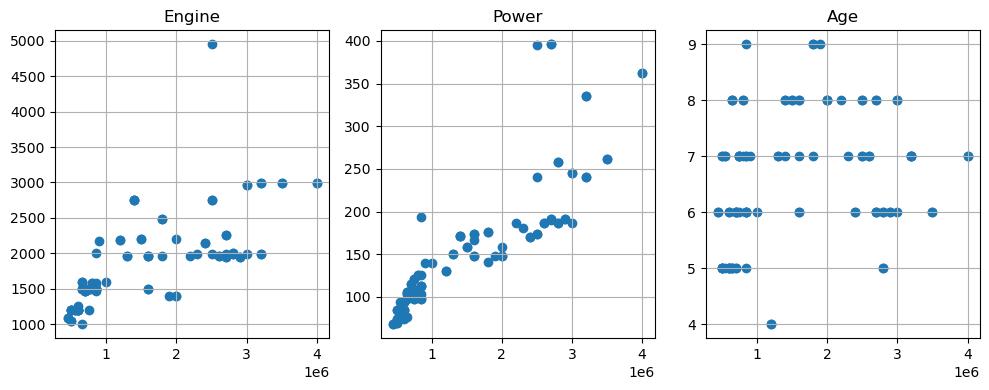

In [125]:
fig, axs = plt.subplots(1,3,sharex=False, figsize=(10, 4))
axs[0].scatter(df2["Price"],df2["Engine"])
axs[0].grid();axs[0].set_title("Engine")
axs[1].scatter(df2["Price"],df2["Power"])
axs[1].grid();axs[1].set_title("Power")
axs[2].scatter(df2["Price"],df2["Age"])
axs[2].grid();axs[2].set_title("Age")
fig.tight_layout()

### Observations:

- Data points with engine exceeding 4,000 and power greater than 350 were identified as outliers.
- Removing these extreme values helps mitigate potential distortions in our model and ensures more accurate predictions during testing.

### Data Filtering
Filter out data points where engine is greater than 4,000 or power is greater than 350.

In [129]:
condition = (df2["Engine"] > 4000) | (df2["Power"] > 350)
df2 = df2[~condition]

### Correlation Analysis and Heatmap

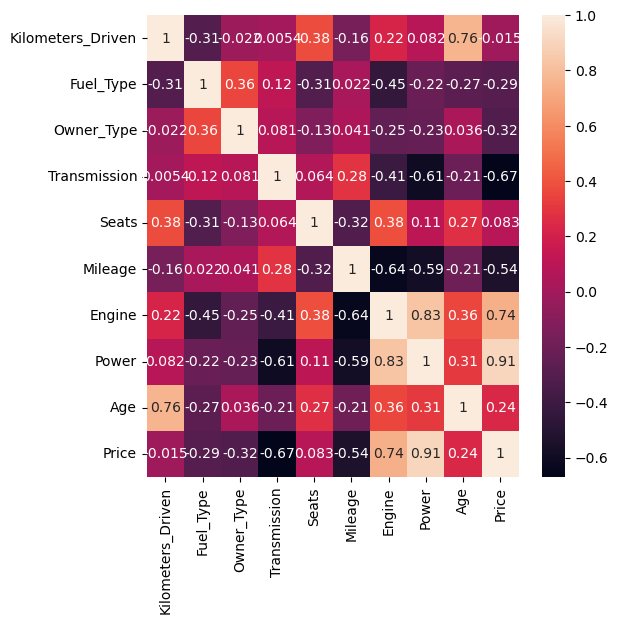

In [130]:
corrmat=df2.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(6,6))

#plot heatmap
g=sns.heatmap(df2[top_corr_features].corr(),annot=True)

### Observations:

- Power exhibits a strong positive correlation with Price (0.91), indicating that as the power of a vehicle increases, its price tends to increase proportionally.
- Engine also shows a strong positive correlation with Price (0.74), suggesting that vehicles with larger engine capacities tend to be priced higher.
- Power and Engine have high positive correlation (0.83), which means more powerful cars tend to have larger engines.
- Transmission shows a strong negative correlation with Price (-0.67), implying that cars with certain types of transmissions (likely manual if encoded as 1) are priced lower than others.
- Mileage shows a moderate negative correlation with Price (-0.54), suggesting that cars with better mileage tend to be cheaper.
- Kilometers_Driven has a very weak negative correlation with Price (-0.015), indicating that mileage alone does not strongly influence price in this dataset.
- Age has a weak positive correlation with Price (0.24), suggesting that the age of the car may impact its selling price.

### Data Preparation
Prepare the data for model training by defining the features (X) and the target variable (y).

Exclude the 'Price' and 'Kilometers_Driven' columns from the feature set as 'Price' is the target variable, and 'Kilometers_Driven' is removed due to its potential negative impact on the model.

In [131]:
# Define features and target variable
X = df2.drop(['Price','Kilometers_Driven'], axis=1)
y = df2['Price']

Print out the feature matrix (X) and the target vector (y) for further analysis or modeling

In [132]:
print(X)

    Fuel_Type  Owner_Type  Transmission  Seats  Mileage  Engine  Power  Age
0           1           0             1      5       15    1498    108    7
1           1           1             0      5       17    1597    140    6
3           0           2             1      5       23    1248     74    5
4           0           1             0      5       18    1999    194    9
5           1           0             1      5       17    1198    108    6
..        ...         ...           ...    ...      ...     ...    ...  ...
95          0           0             0      5       16    1950    191    6
96          0           1             1      7       13    2755    171    8
97          1           2             1      5       18    1497    121    7
98          1           1             0      5       17    1497    113    6
99          1           0             1      5       20    1199     85    5

[95 rows x 8 columns]


In [134]:
print(y)

0      800000
1     1000000
3      600000
4      850000
5      750000
       ...   
95    2900000
96    1400000
97     750000
98     850000
99     600000
Name: Price, Length: 95, dtype: int64


### Splitting Dataset into training and test data

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (76, 8)
x test:  (19, 8)
y train:  (76,)
y test:  (19,)


## 1. Linear Regression
In this section, we utilise Linear Regression to analyse the relationship between predictor variables and the target variable, Price. Linear Regression is a statistical technique used to model the relationship between one or more independent variables and a continuous dependent variable. By fitting a linear equation to the observed data, Linear Regression allows us to make predictions about the dependent variable based on the values of the independent variables. 

### Build Model

In [136]:
predictor = LinearRegression()

In [137]:
predictor.fit(X_train, y_train)

LinearRegression()

### Evaluate Model

In [138]:
# Prediction on Test data
y_pred_linear = predictor.predict(X_test)

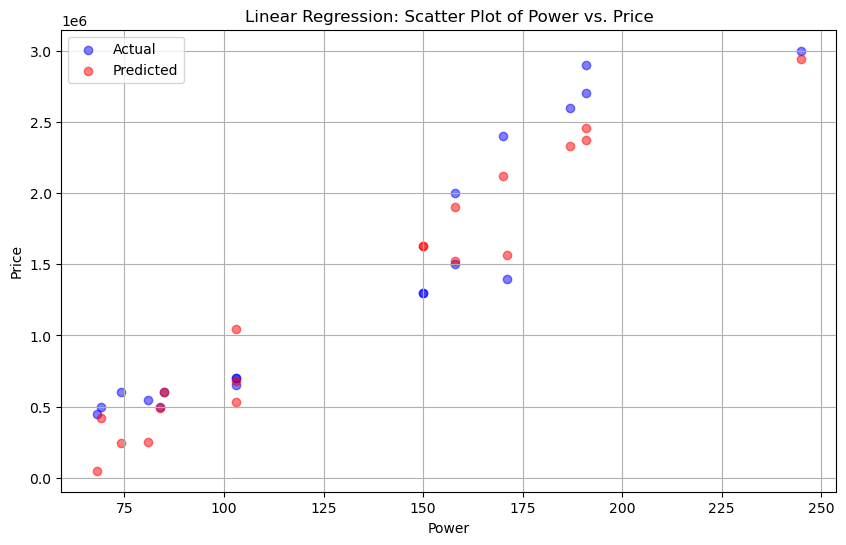

In [139]:
# Create a scatter plot for X_test vs. Price (Actual and Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Power'], y_test, alpha=0.5, label='Actual', c='blue')
plt.scatter(X_test['Power'], y_pred_linear, alpha=0.5, label='Predicted', c='red') 
plt.xlabel("Power")
plt.ylabel("Price")
plt.title("Linear Regression: Scatter Plot of Power vs. Price")
plt.legend()
plt.grid(True)
plt.show()

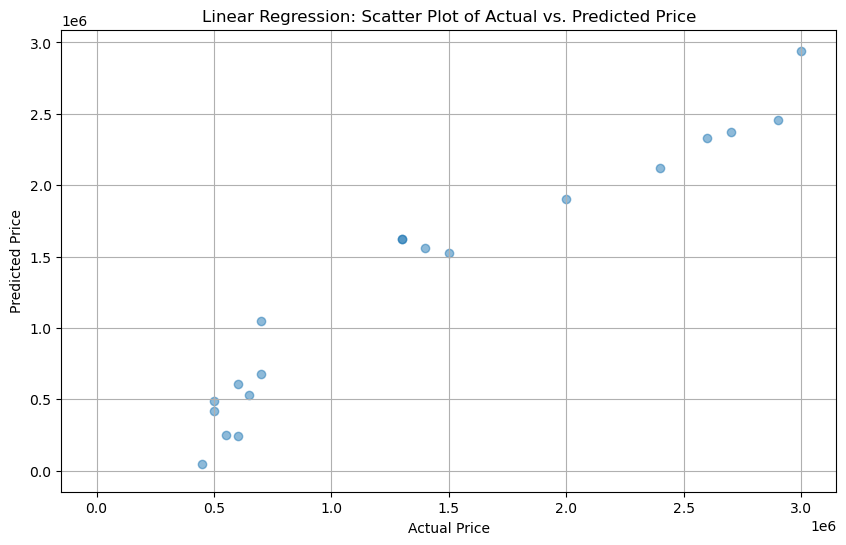

In [140]:
# Comparing the range of predicted and actual data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([0, 20], [0, 20], ls="--", c="black", alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Scatter Plot of Actual vs. Predicted Price")
plt.grid()
plt.show()

In [141]:
# Evaluation Metrics
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred_linear)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred_linear)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred_linear))}")
print(f"R2 Score: {r2_score(y_test,y_pred_linear)}")

Mean Absolute Error: 207678.48940530772
Mean Squared Error: 64347186465.802284
Root Mean Squared Error: 253667.47222653968
R2 Score: 0.920580757242454


## 2. Gradient Boosting
In this section, we explore Gradient Boosting, a machine learning method used in regression and classification tasks. Unlike Linear Regression, which fits a single model, Gradient Boosting sequentially combines weak learners like decision trees. It excels at capturing complex relationships, is resistant to overfitting, and autonomously handles missing data and feature interactions.

### Build Model

In [142]:
gb_model = GradientBoostingRegressor(random_state=42)

In [143]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

### Evaluate Gradient Boosting Model

In [144]:
# Prediction on Test data
y_pred_gb = gb_model.predict(X_test)

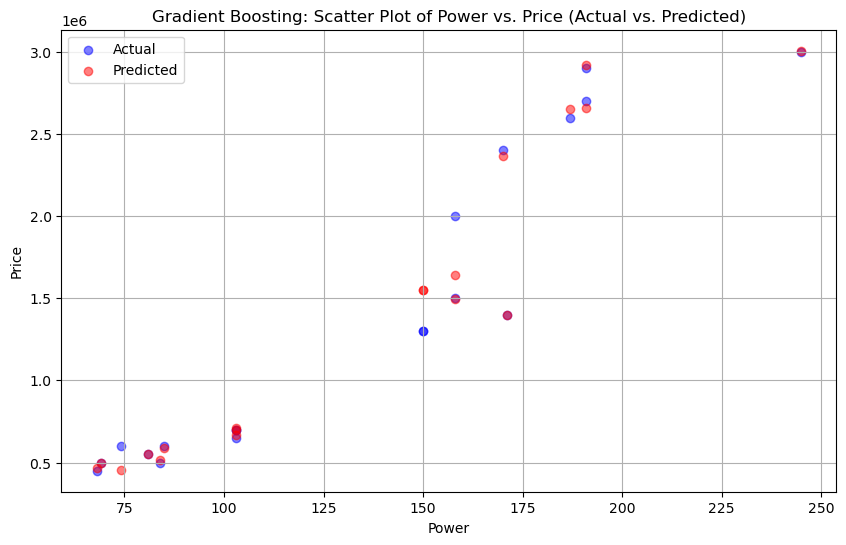

In [145]:
# Create a scatter plot for X_test vs. Selling_Price (Actual and Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Power'], y_test, alpha=0.5, label='Actual', c='blue')
plt.scatter(X_test['Power'], y_pred_gb, alpha=0.5, label='Predicted', c='red')
plt.xlabel("Power")
plt.ylabel("Price")
plt.title("Gradient Boosting: Scatter Plot of Power vs. Price (Actual vs. Predicted)")
plt.legend()
plt.grid(True)
plt.show()

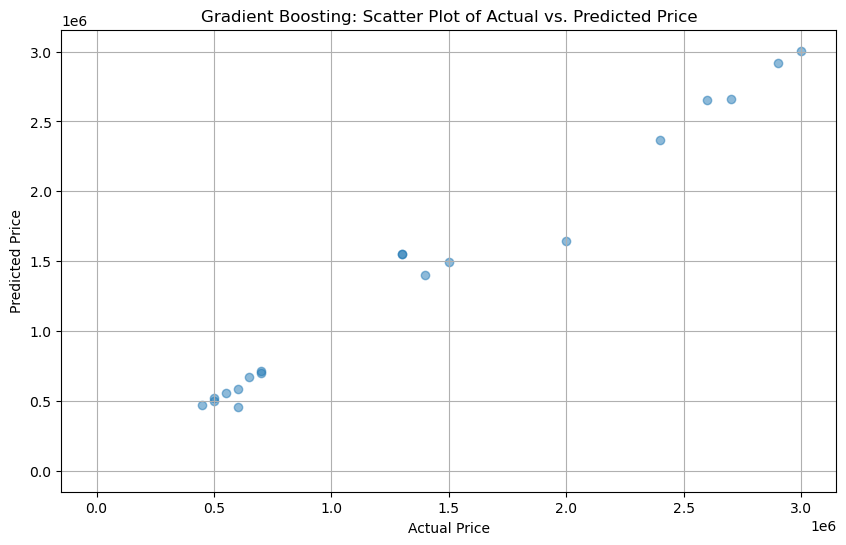

In [146]:
# Comparing the range of predicted and actual data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([0, 20], [0, 20], ls="--", c="black", alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting: Scatter Plot of Actual vs. Predicted Price")
plt.grid()
plt.show()

In [147]:
# Evaluation Metrics
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred_gb)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred_gb)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred_gb))}")
print(f"R2 Score: {r2_score(y_test,y_pred_gb)}")

Mean Absolute Error: 65142.00530149967
Mean Squared Error: 14681379327.573345
Root Mean Squared Error: 121166.74183773923
R2 Score: 0.9818797978144416


## 3. Random Forest
In this section, we explore Random Forest, a powerful ensemble learning algorithm widely used for regression and classification tasks. Unlike single decision trees, Random Forest builds multiple trees and combines their predictions to enhance accuracy and reduce overfitting.

### Validation Curve
To determine the suitable number of trees for a Random Forest model

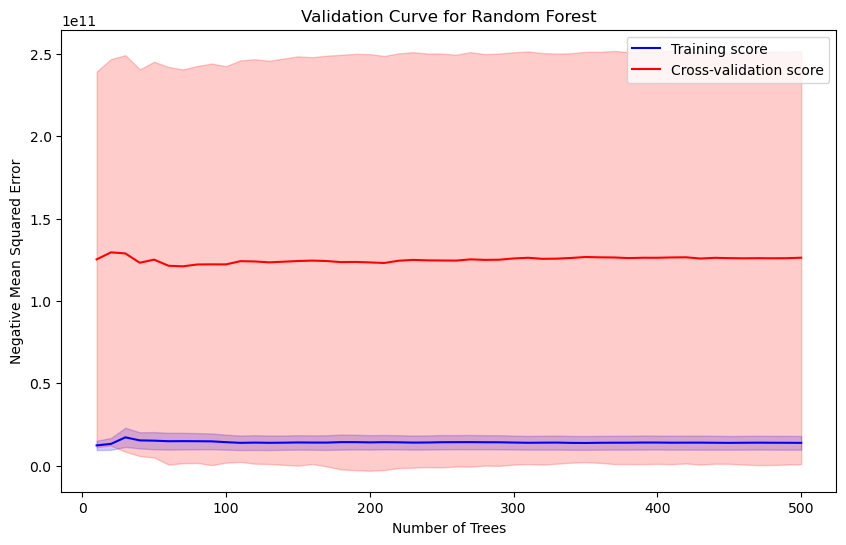

In [149]:
# Define a range of values for the number of trees (n_estimators)
param_range = np.arange(10, 501, 10)

# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Compute training and validation scores for different numbers of trees
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)

# Calculate mean and standard deviation of training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)
plt.title("Validation Curve for Random Forest")
plt.xlabel("Number of Trees")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.show()

### Build Model

In [150]:
# Build Model
model = RandomForestRegressor(n_estimators=500, random_state=42) 

In [151]:
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

### Evaluate Random Forest Model

In [152]:
# Prediction on Test data
y_pred_rf = model.predict(X_test)

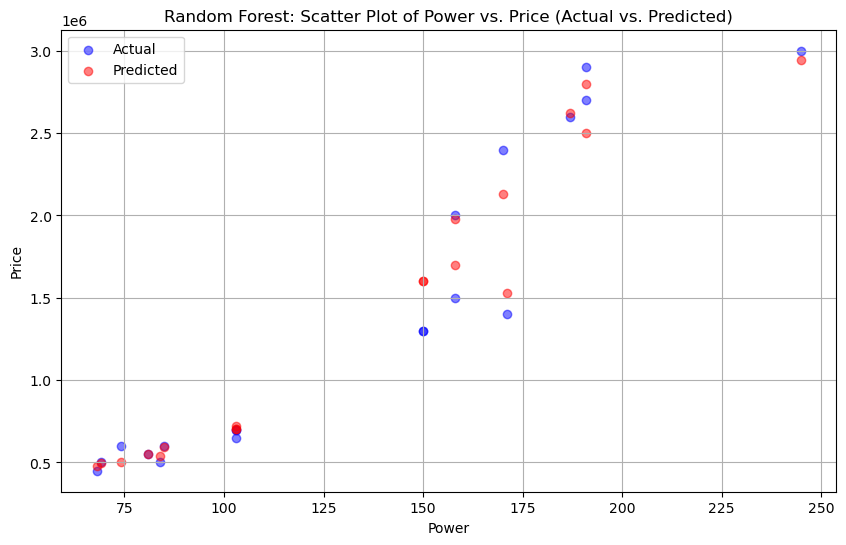

In [153]:
# Create a scatter plot for X_test vs. Selling_Price (Actual and Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Power'], y_test, alpha=0.5, label='Actual', c='blue')
plt.scatter(X_test['Power'], y_pred_rf, alpha=0.5, label='Predicted', c='red')
plt.xlabel("Power")
plt.ylabel("Price")
plt.title("Random Forest: Scatter Plot of Power vs. Price (Actual vs. Predicted)")
plt.legend()
plt.grid(True)
plt.show()

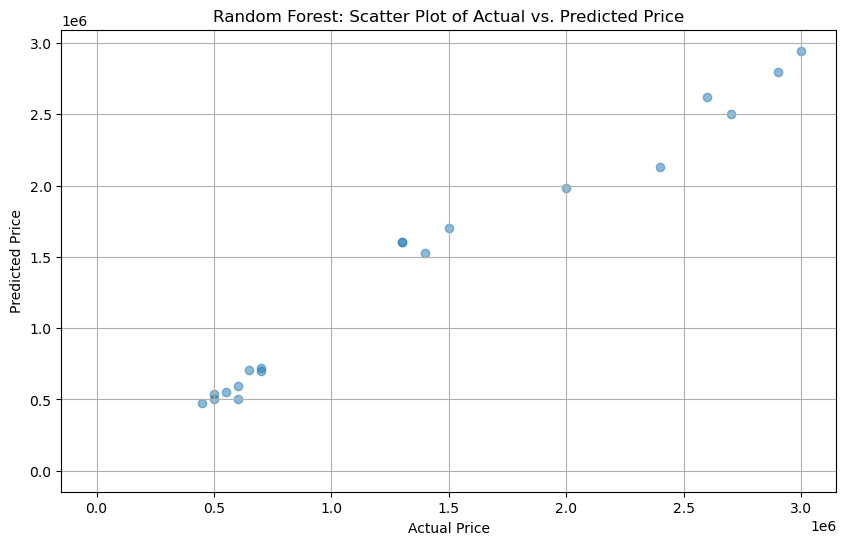

In [154]:
# Comparing the range of predicted and actual data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([0, 20], [0, 20], ls="--", c="black", alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Scatter Plot of Actual vs. Predicted Price")
plt.grid()
plt.savefig('scatter_plot.png')  # Save the plot as an image file
plt.show()

In [155]:
# Evaluation Metrics
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred_rf)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred_rf)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred_rf))}")
print(f"R2 Score: {r2_score(y_test,y_pred_rf)}")

Mean Absolute Error: 97326.31578947368
Mean Squared Error: 20223773684.210526
Root Mean Squared Error: 142210.31497120918
R2 Score: 0.9750392071523812


### Feature Importance

#### Define Hyperparameters

In [156]:
features=['sqrt', 'log2'] 
depth=[None, 3, 4]
samplemin_split=[2, 5, 10] 
samplemin_leaf=[1, 2, 4]
param_test={'max_features': features,
                'max_depth': depth,
                'min_samples_split': samplemin_split,
                'min_samples_leaf': samplemin_leaf}

#### Grid Search with Cross-Validation

In [157]:
Rdmnforest_estimator=GridSearchCV(estimator=model, param_grid=param_test)

Rdmnforest_estimator.fit(X_train, y_train)

print('Best parameters: ', Rdmnforest_estimator.best_params_)

Best parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


#### Feature Importance Visualization

In [158]:
def featureimportance(columns, importances, n=10):
    df = (pd.DataFrame({'features': columns,
                        'feature_importance': importances})
          .sort_values('feature_importance', ascending = False)
          .reset_index(drop = True))
    
    plt.figure(figsize=(10,6))
    sns.barplot(x='feature_importance',
                y='features',
                data=df[:n],
                orient='h')
    plt.title('Feature Importance', fontsize='15')

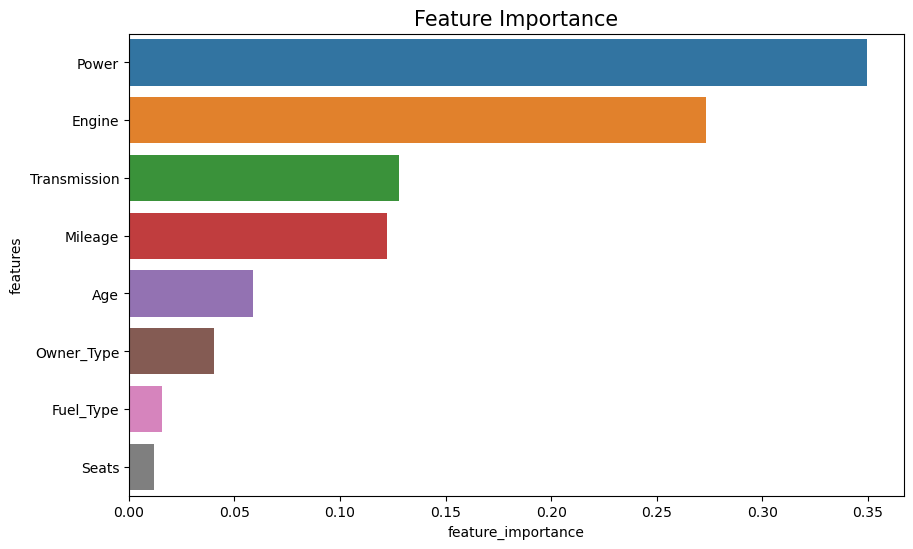

In [159]:
featureimportance(X_train.columns, Rdmnforest_estimator.best_estimator_.feature_importances_)

#### Feature Importance Coefficients

In [160]:
RdmForest_estimator_coefficients=pd.DataFrame(Rdmnforest_estimator.best_estimator_.feature_importances_, X_test.columns, columns=['Importance'])
RdmForest_estimator_coefficients.sort_values('Importance', ascending=False)

Importance
Power           0.349566
Engine          0.273362
Transmission    0.127967
Mileage         0.122373
Age             0.058809
Owner_Type      0.040504
Fuel_Type       0.015759
Seats           0.011661

The results show the relative importance of each feature in the model for predicting car selling prices. Power was by far the most important factor with an importance score of 0.35. Engine and Transmission were also highly influential, with scores around 0.27 and 0.13 respectively. Mileage and Age followed with importances near 0.12 and 0.06. Owner_Type was moderately significant at 0.04. This indicates that variables related to the car's Power, Engine, Transmission, Mileage and Age predominantly drove the model's predictions, while Owner_Type had a smaller but still notable impact. Features with higher values contributed more to the model's ability to forecast prices accurately.

### Evaluation

In [161]:
# Create a DataFrame
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Gradient Boosting','Random Forest'],
    'Mean Absolute Error': [mean_absolute_error(y_test, y_pred_linear), mean_absolute_error(y_test, y_pred_gb),
                             mean_absolute_error(y_test, y_pred_rf)],
    'Mean Squared Error': [mean_squared_error(y_test, y_pred_linear), mean_squared_error(y_test, y_pred_gb),
                           mean_squared_error(y_test, y_pred_rf)],
    'Root Mean Squared Error': [np.sqrt(mean_squared_error(y_test, y_pred_linear)),
                                np.sqrt(mean_squared_error(y_test, y_pred_gb)),
                                np.sqrt(mean_squared_error(y_test, y_pred_rf))],
    'R2 Score': [r2_score(y_test, y_pred_linear), r2_score(y_test, y_pred_gb), r2_score(y_test, y_pred_rf)]
})

# Display the DataFrame
print(results_df)

               Model  Mean Absolute Error  Mean Squared Error  \
0  Linear Regression        207678.489405        6.434719e+10   
1  Gradient Boosting         65142.005301        1.468138e+10   
2      Random Forest         97326.315789        2.022377e+10   

   Root Mean Squared Error  R2 Score  
0            253667.472227  0.920581  
1            121166.741838  0.981880  
2            142210.314971  0.975039  


#### Observations:
- Linear Regression provides a baseline for comparison. It has a relatively high MAE of 1.352482 and MSE of 3.545683, indicating some degree of error in its predictions. The R2 score of 0.871480 suggests that the model explains about 87.15% of the variance in the selling price.
- Gradient Boosting demonstrates superior performance compared to Linear Regression, with significantly lower MAE of 0.553074, MSE of 0.662201, and RMSE of 0.813757. The high R2 score of 0.975997 indicates that the model explains about 97.60% of the variance in the selling price.
- Random Forest performs well with relatively low MAE of 0.534040, but it has a higher MSE of 0.718016 and RMSE of 0.720099 compared to Gradient Boosting. The R2 score of 0.973974 indicates that the model explains about 97.40% of the variance in the selling price.

#### Conclusion:
Gradient Boosting demonstrates the best performance among the models considered, with the lowest error metrics and highest R2 score, indicating its effectiveness in predicting the selling price of vehicles.

# Supervised Learning: Classification
In this section, we explore supervised learning techniques for classification using the employee dataset obtained from Kaggle. The goal is to predict employee attrition based on factors such as education, experience and payment tier, to support proactive employee retention and workforce planning. We employ several classification algorithms to model the relationships between the features and the target variable, including logistic regression, support vector machine (SVM), random forest, and k-nearest neighbors (KNN).

Data Source: https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

### Features
- Education: The educational qualifications of employees, including degree, institution, and field of study
- JoiningYear: The year each employee joined the company, indicating their length of service
- City: The location or city where each employee is based or works
- PaymentTier: Categorisation of employees into different salary tiers
- Age: The age of each employee, providing demographic insights
- Gender: Gender identity of employees, promoting diversity analysis
- EverBenched: Indicates if an employee has ever been temporarily without assigned work
- ExperienceInCurrentDomain: The number of years of experience employees have in their current field
- LeaveOrNot: Whether the employee left the company (target column)

## Data Reading and Cleaning

### Read the Dataset

In [282]:
df3 = pd.read_csv('/Users/fana/Desktop/SIM_Macbook/DSBA/Year 4/ST3189 (ML)/ST3189 Coursework/employee.csv') 

### Display first few rows of dataset

In [234]:
df3.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1

### Dataset Overview

In [235]:
# Display the shape of the dataset
print("Shape of the dataset:", df3.shape)

Shape of the dataset: (4653, 9)


In [236]:
print(df3.columns)

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')


### Class Distribution Analysis

In [237]:
df3['target'] = df3['LeaveOrNot']

In [238]:
# Determine how many positive (1) and negative (0) samples we have in our dataframe
df3.target.value_counts()

0    3053
1    1600
Name: target, dtype: int64

In [239]:
# Normalised value counts
df3.target.value_counts(normalize=True)

0    0.656136
1    0.343864
Name: target, dtype: float64

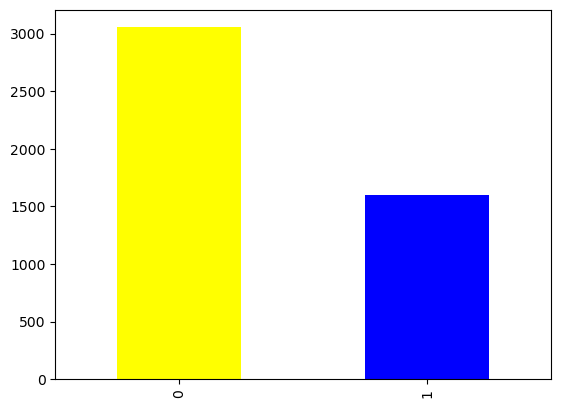

In [240]:
# Plot the value counts with a bar graph
df3.target.value_counts().plot(kind="bar", color=["yellow", "blue"]);

### Data Information and Summary Statistics

In [241]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
 9   target                     4653 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 363.6+ KB


In [242]:
df3.describe()

JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000                4653.000000   
mean   2015.062970     2.698259    29.393295                   2.905652   
std       1.863377     0.561435     4.826087                   1.558240   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     3.000000    26.000000                   2.000000   
50%    2015.000000     3.000000    28.000000                   3.000000   
75%    2017.000000     3.000000    32.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot       target  
count  4653.000000  4653.000000  
mean      0.343864     0.343864  
std       0.475047     0.475047  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000

In [243]:
# Check for missing values
print("NULL VALUES: ", df3.isnull().sum(), '\n'*2)

# Check for duplicate values
print("DUPLICATES VALUES: ", df3.duplicated().sum())

NULL VALUES:  Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
target                       0
dtype: int64 


DUPLICATES VALUES:  1889


In [244]:
df3.drop_duplicates(keep='first', inplace=True)

In [245]:
# Check for duplicate values
print("DUPLICATES VALUES: ", df3.duplicated().sum())

DUPLICATES VALUES:  0


### Correlation Heatmap

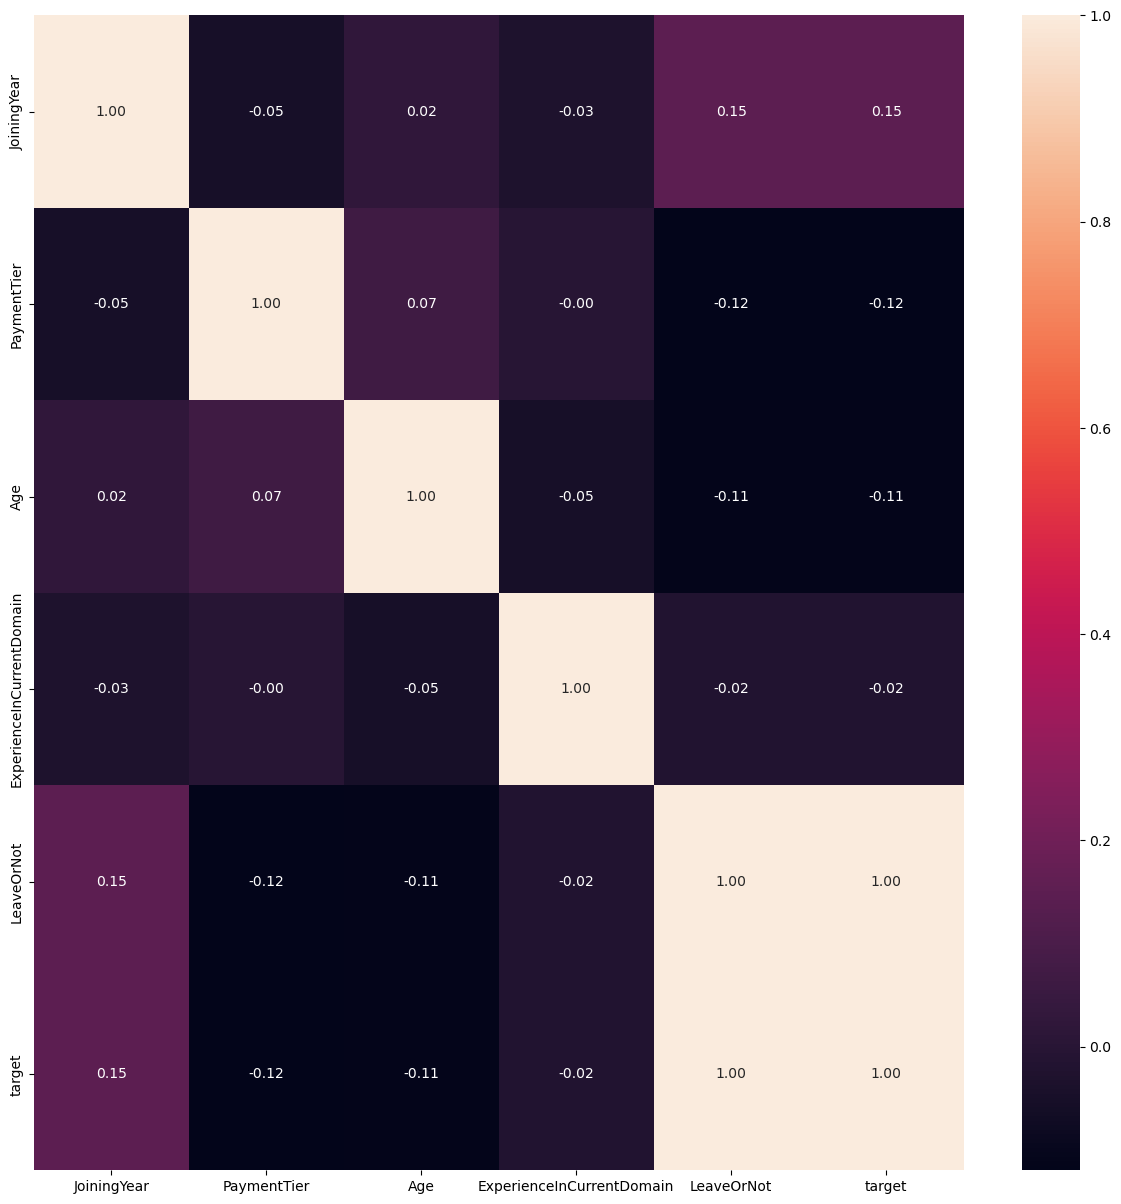

In [246]:
plt.figure(figsize=(15,15))
sns.heatmap(df3.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

### Relationship Visualisation

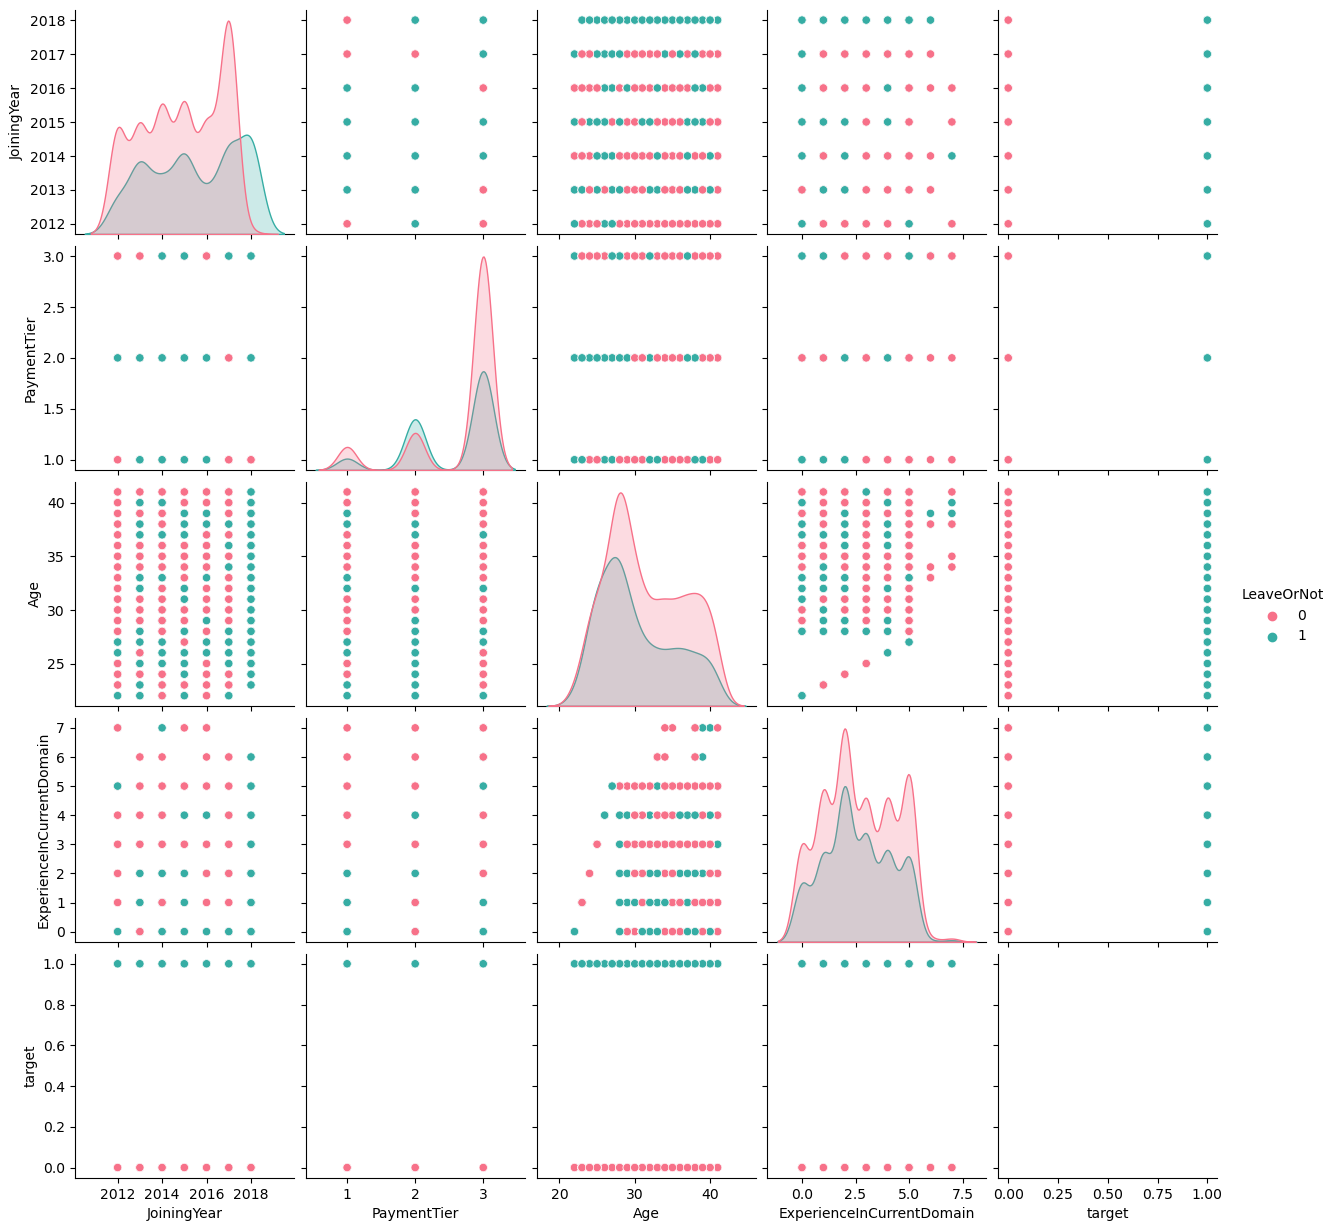

In [247]:
# ignoring divide error and pair plotting
with np.errstate(divide='ignore',invalid='ignore'):
    sns.pairplot(df3, hue="LeaveOrNot", palette="husl")
plt.show()

### Feature Engineering

In [248]:
# Turning categorical data into dummy variables
a = pd.get_dummies(df3['City'], prefix = "City")

frames = [df3, a]
df3 = pd.concat(frames, axis = 1)
df3.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot', 'target',
       'City_Bangalore', 'City_New Delhi', 'City_Pune'],
      dtype='object')

In [249]:
# Dropping categorized columns / thal_0 miscreated by get_dummies
df3 = df3.drop(columns = ['City'])

df3

Education  JoiningYear  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017            3   34    Male          No   
1     Bachelors         2013            1   28  Female          No   
2     Bachelors         2014            3   38  Female          No   
3       Masters         2016            3   27    Male          No   
4       Masters         2017            3   24    Male         Yes   
...         ...          ...          ...  ...     ...         ...   
4645    Masters         2017            2   31  Female          No   
4647  Bachelors         2016            3   30    Male          No   
4649    Masters         2013            2   37    Male          No   
4650    Masters         2018            3   27    Male          No   
4651  Bachelors         2012            3   30    Male         Yes   

      ExperienceInCurrentDomain  LeaveOrNot  target  City_Bangalore  \
0                             0           0       0               1   
1                             3           1       1               0   
2                             2           0       0               0   
3                             5           1       1               1   
4                             2           1       1               0   
...                         ...         ...     ...             ...   
4645                          2           0       0               0   
4647                          2           0       0               0   
4649                          2           1       1               0   
4650                          5           1       1               0   
4651                          2           0       0               1   

      City_New Delhi  City_Pune  
0                  0          0  
1                  0          1  
2                  1          0  
3                  0          0  
4                  0          1  
...              ...        ...  
4645               0          1  
4647               0          1  
4649               0          1  
4650               1          0  
4651               0          0  

[2764 rows x 12 columns]

### Encoding Categorical Variables

In [250]:
df3.loc[:,['Education', 'Gender','EverBenched']].apply(LabelEncoder().fit_transform)

Education  Gender  EverBenched
0             0       1            0
1             0       0            0
2             0       0            0
3             1       1            0
4             1       1            1
...         ...     ...          ...
4645          1       0            0
4647          0       1            0
4649          1       1            0
4650          1       1            0
4651          0       1            1

[2764 rows x 3 columns]

### Age and Gender Analysis

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Frequency'>

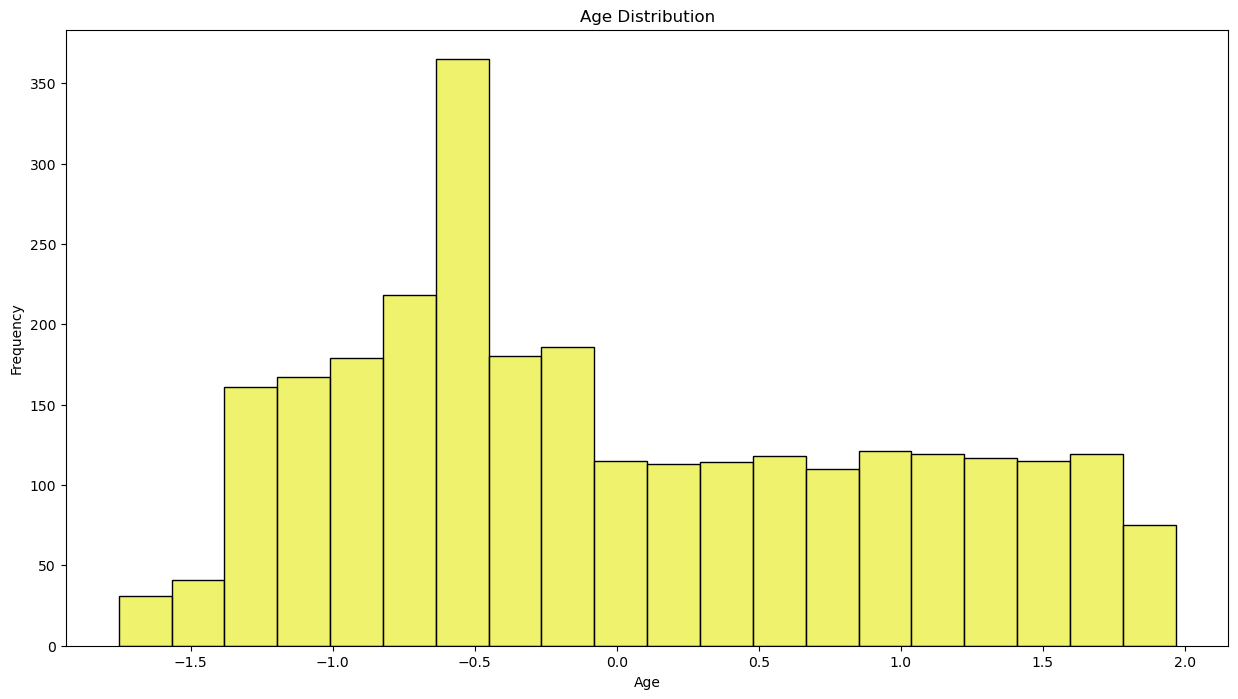

In [268]:
plt.figure(figsize=(15,8))
plt.title('Age Distribution')
plt.ylabel('Frequency')
sns.histplot(df3['Age'],color='#E9EE3B',bins=20)

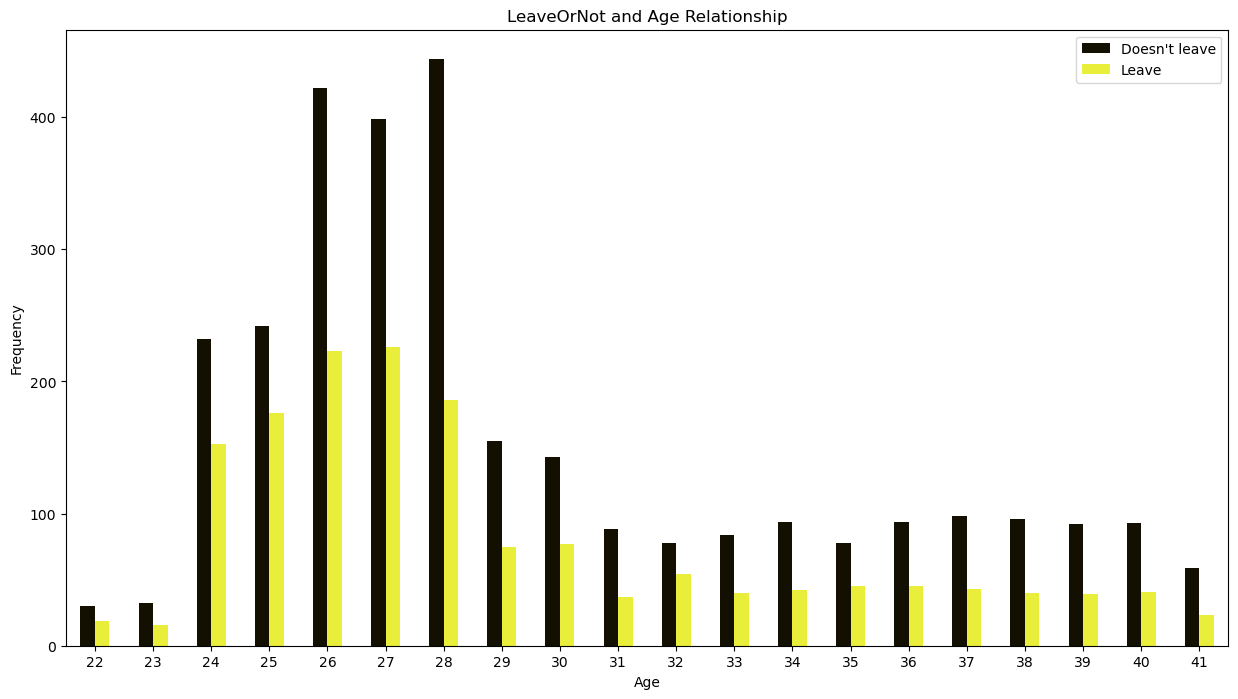

In [283]:
pd.crosstab(df3.Age,df3.LeaveOrNot).plot(kind="bar",figsize=(15,8), color=['#131002','#E9EE3B'])
plt.title('LeaveOrNot and Age Relationship')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.legend(["Doesn't leave", "Leave"])
plt.ylabel('Frequency')
plt.show()

#### Observations:

- The highest frequency is populated mostly at the age range of 24-31 years old.
- The diagram is seen to be left-skewed.

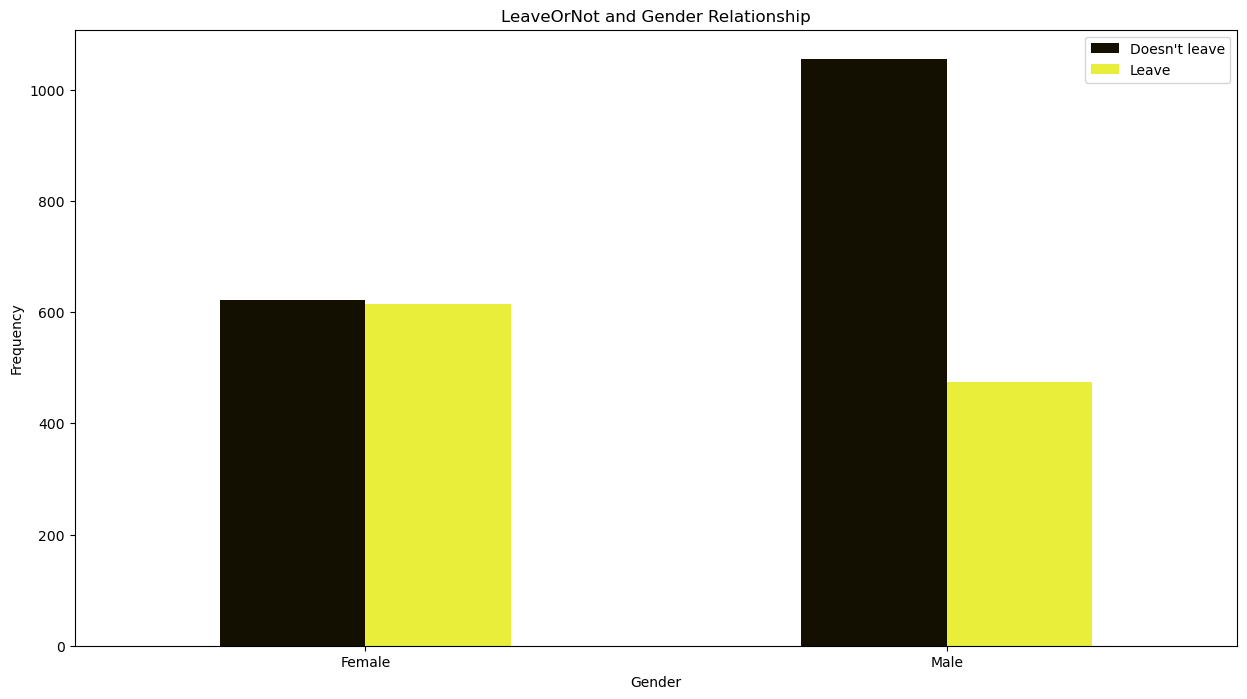

In [252]:
pd.crosstab(df3.Gender,df3.LeaveOrNot).plot(kind="bar",figsize=(15,8), color=['#131002','#E9EE3B'])
plt.title('LeaveOrNot and Gender Relationship')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(["Doesn't leave", "Leave"])
plt.ylabel('Frequency')
plt.show()

#### Observations:
- Females are more likely to leave than Males. 

### Data Scaling

#### Data Preparation

In [257]:
# Define Numerical and Categorical Columns
df3_numerical=['Age', 'ExperienceInCurrentDomain']
df3_categorical=['Education', 'JoiningYear', 'PaymentTier', 'Gender', 'EverBenched']

In [258]:
# Check Target Variable Distribution
df3_targetcounts=df3['LeaveOrNot'].value_counts(ascending=True)
df3_targetcounts

1    1088
0    1676
Name: LeaveOrNot, dtype: int64

### Scaling Numerical Data
#### Standardization using StandardScaler

In [259]:
# Create an instance of StandardScaler
ss = StandardScaler()

# Fit and transform the numerical columns using the scaler
df3[df3_numerical]=ss.fit_transform(df3[df3_numerical])

### Encode Categorical Variables
#### One-Hot Encoding

In [260]:
df3=pd.get_dummies(df3, columns=df3_categorical, drop_first=True) 
df3.head()

Age  ExperienceInCurrentDomain  LeaveOrNot  target  City_Bangalore  \
0  0.596528                  -1.642132           0       0               1   
1 -0.578112                   0.220853           1       1               0   
2  1.379621                  -0.400142           0       0               0   
3 -0.773885                   1.462843           1       1               1   
4 -1.361206                  -0.400142           1       1               0   

   City_New Delhi  City_Pune  Education_Masters  Education_PHD  \
0               0          0                  0              0   
1               0          1                  0              0   
2               1          0                  0              0   
3               0          0                  1              0   
4               0          1                  1              0   

   JoiningYear_2013  JoiningYear_2014  JoiningYear_2015  JoiningYear_2016  \
0                 0                 0                 0                 0   
1                 1                 0                 0                 0   
2                 0                 1                 0                 0   
3                 0                 0                 0                 1   
4                 0                 0                 0                 0   

   JoiningYear_2017  JoiningYear_2018  PaymentTier_2  PaymentTier_3  \
0                 1                 0              0              1   
1                 0                 0              0              0   
2                 0                 0              0              1   
3                 0                 0              0              1   
4                 1                 0              0              1   

   Gender_Male  EverBenched_Yes  
0            1                0  
1            0                0  
2            0                0  
3            1                0  
4            1                1

### Splitting Data for Training and Testing

In [261]:
x_data3 = df3.drop(['LeaveOrNot'], axis=1)

# Normalization
target3=df3['LeaveOrNot']

# Splitting into train/test
x_train, x_test, y_train, y_test=train_test_split(x_data3, target3, test_size=0.3, random_state=42)

### Model Preparation
#### Define Model Function

In [262]:
KNN_grid = None

def model(classifier):

    # Make predictions
    prediction = classifier.predict(x_test)
    y_score = classifier.predict_proba(x_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, y_score[:, 1])
   
    # Define model name based on the classifier
    if classifier == dummy:
        name = 'Dummy Classifier'
    elif classifier == LogReg_grid:
        name = 'Logistic Regression'
    elif classifier == SVC_grid:
        name = 'Support Vector Classifier'
    elif classifier == KNN_grid:
        name = 'K-Nearest Neighbours'
    elif classifier == RdmForest_grid:
        name = 'Random Forest' 
        
    # Plot ROC Curve
    RocCurveDisplay.from_estimator(classifier, x_test, y_test, name=name)
    plt.xlabel('False Positive Rate (FPR)', fontsize='12')
    plt.ylabel('True Positive Rate (TPR)', fontsize='12')
    plt.title('ROC_AUC', fontsize='15')
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
    plt.legend(loc='lower right', fontsize='12')
    plt.show()
    
    # Plot Precision-Recall Curve
    PrecisionRecallDisplay.from_estimator(classifier, x_test, y_test, name=name)
    plt.xlabel('Recall', fontsize='12')
    plt.ylabel('Precision', fontsize='12')
    plt.title('Precision-Recall Curve', fontsize='15')
    plt.legend(loc='lower left', fontsize='12')
    plt.show()
    
    # Print evaluation metrics
    print(name)
    print('F1 Score: ', round(f1,3))
    print('ROC_AUC Score: ', round(auc,3))
    print('Accuracy: ', round(accuracy,3))

### Model Evaluation
#### Classification Metrics and Visualizations

In [264]:
def model_classif(classifier):
    # Make predictions
    prediction=classifier.predict(x_test)
    
    # Print Classification Report
    print(classification_report(y_test, prediction))

    # Plot Confusion Matrix
    confuse=confusion_matrix(y_test, prediction)
    names=['True Neg','False Pos','False Neg','True Pos']
    counts=[value for value in confuse.flatten()]
    percentages=['{0:0.2%}'.format(value) for value in confuse.flatten()/np.sum(confuse)]
    datalables=[f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    datalables=np.asanyarray(datalables).reshape(2, 2)
    class_labels=['Did Not Leave', 'Leave']
    df_confuse=pd.DataFrame(confuse, index=class_labels, columns=class_labels)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_confuse, annot=datalables, fmt='', cmap='Blues', linewidths=2)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.yticks(rotation=0)
    plt.title('Confusion Matrix', fontsize='15')
    plt.show()

### Dummy

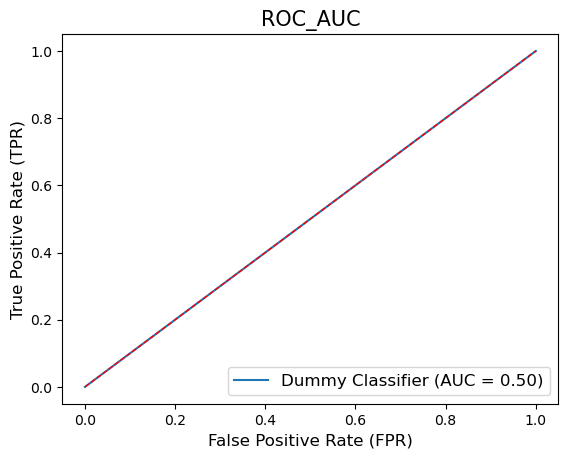

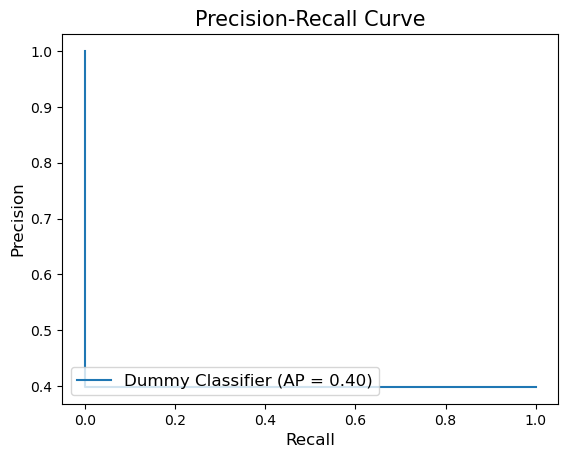

Dummy Classifier
F1 Score:  0.0
ROC_AUC Score:  0.5
Accuracy:  0.601
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       499
           1       0.00      0.00      0.00       331

    accuracy                           0.60       830
   macro avg       0.30      0.50      0.38       830
weighted avg       0.36      0.60      0.45       830



/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



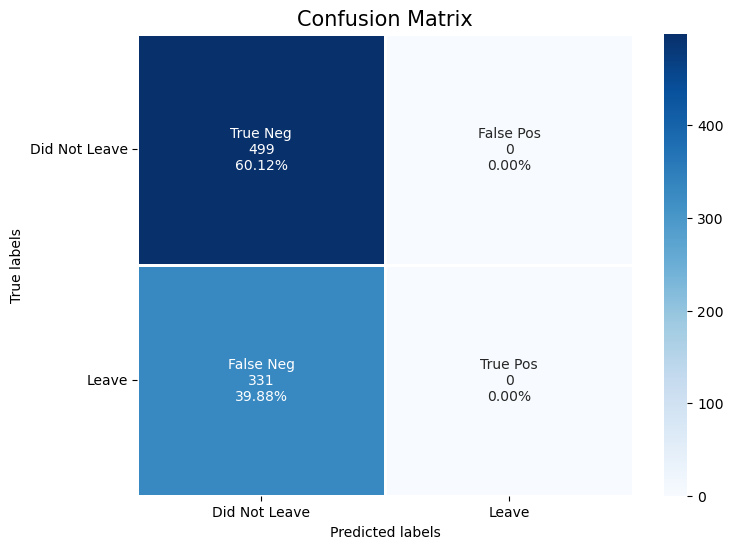

In [265]:
dummy=DummyClassifier().fit(x_train, y_train)

model(dummy)
model_classif(dummy)

## 1. Logistic Regression
In this section, we explore Logistic Regression, a classic linear model used for binary classification tasks. Logistic Regression calculates the probability that a given input belongs to a certain class using a logistic function. The model's parameters are optimized using GridSearchCV to find the best regularization parameter (C), which controls the strength of regularization.

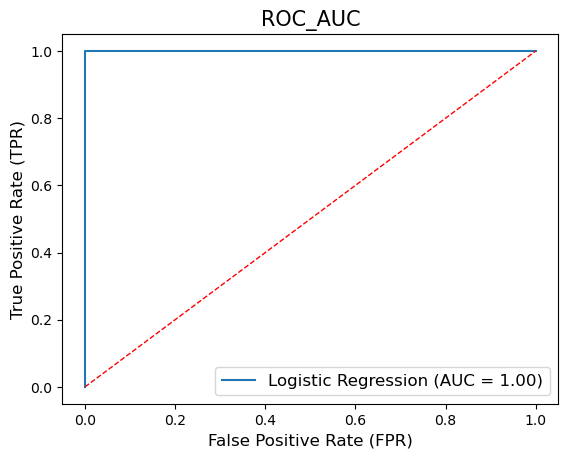

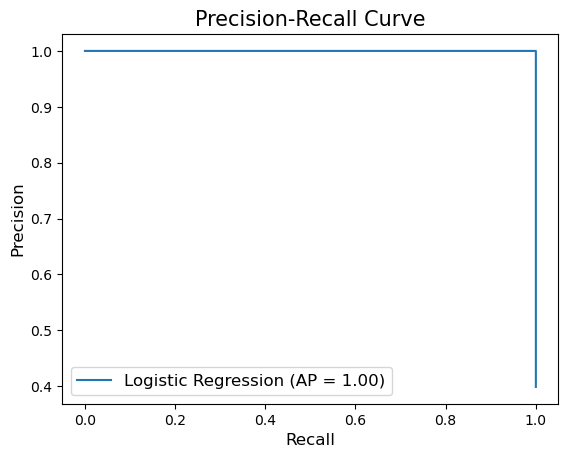

Logistic Regression
F1 Score:  1.0
ROC_AUC Score:  1.0
Accuracy:  1.0
The best parameters are:  {'C': 0.1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       331

    accuracy                           1.00       830
   macro avg       1.00      1.00      1.00       830
weighted avg       1.00      1.00      1.00       830



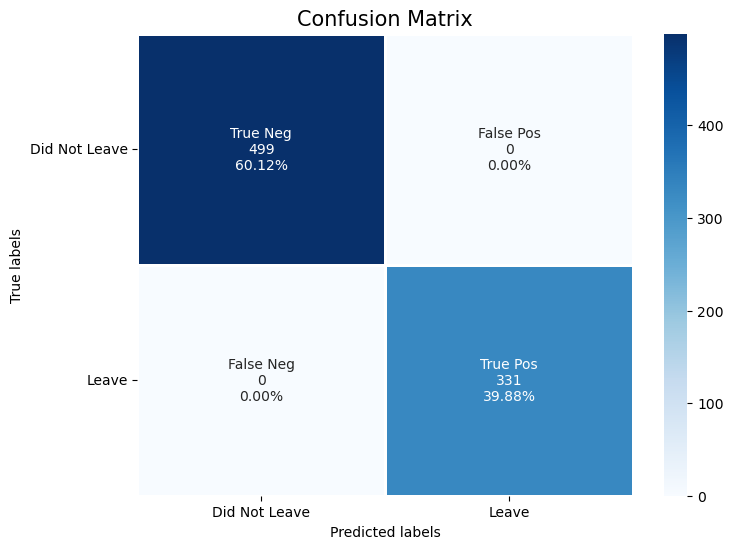

In [269]:
LogReg = LogisticRegression(random_state=42)  # Instantiate Logistic Regression model

parameters = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2, 5, 10]}  # Define hyperparameters grid

LogReg_grid = GridSearchCV(LogReg, param_grid=parameters, cv=5, scoring='f1').fit(x_train, y_train)  # Perform GridSearchCV for hyperparameter tuning

model(LogReg_grid)  # Evaluate the model

print('The best parameters are: ', LogReg_grid.best_params_)  # Print the best parameters found

model_classif(LogReg_grid)  # Evaluate classification performance

## 2. Support Vector Machine
In this section, we explore Support Vector Machine (SVM), a supervised learning algorithm capable of performing classification and regression tasks. SVM works by finding the hyperplane that best separates the classes in the feature space. We use GridSearchCV to tune the hyperparameters gamma and C, which control the model's flexibility and regularization, respectively.

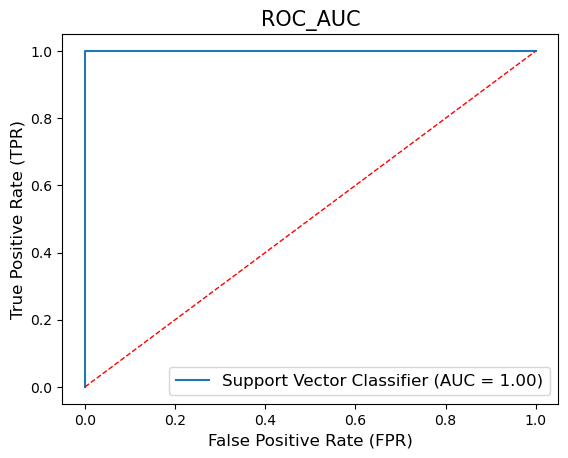

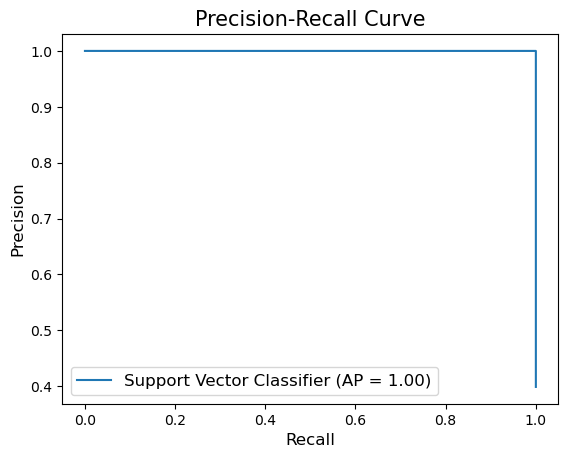

Support Vector Classifier
F1 Score:  1.0
ROC_AUC Score:  1.0
Accuracy:  1.0
The best parameters are:  {'C': 0.1, 'gamma': 0.1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       331

    accuracy                           1.00       830
   macro avg       1.00      1.00      1.00       830
weighted avg       1.00      1.00      1.00       830



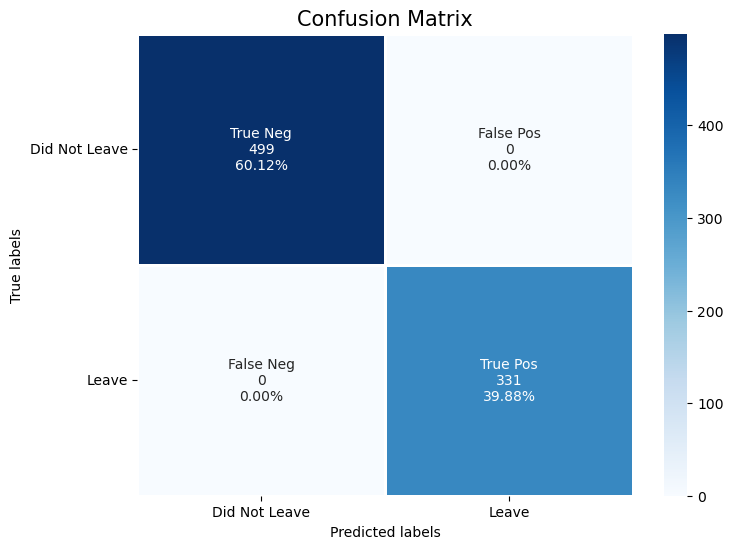

In [270]:
SVC=SVC(probability=True, random_state=42)

parameters={'gamma': [0.1, 0.25, 0.5, 0,75, 1, 2, 10],
                'C': [0.1, 0.25, 0.5, 0.75, 1, 2, 3]}

SVC_grid = GridSearchCV(SVC, param_grid=parameters, cv=5, scoring= 'f1').fit(x_train, y_train)

model(SVC_grid)

print('The best parameters are: ', SVC_grid.best_params_)

model_classif(SVC_grid)

## 3. K-Nearest Neighbours
In this section, we explore K-Nearest Neighbours (KNN), a classification algorithm. KNN works by finding the 'k' nearest data points in the feature space and classifying the new data point based on the majority class among its nearest neighbours. We use GridSearchCV to tune KNN's hyperparameters, including the number of neighbours 'k', the weighting scheme, and the distance metric.

/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fana/anaconda3/lib/python3.11

/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fana/anaconda3/lib/python3.11

/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:976: UserWarning:

One or more of the test scores are non-finite: [       nan 0.9635645         nan 0.94930247]



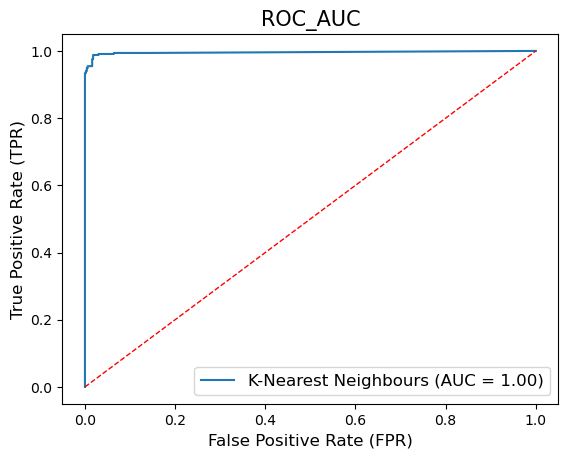

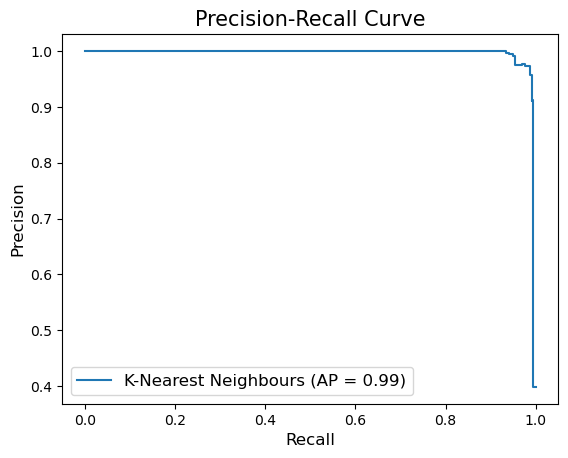

K-Nearest Neighbours
F1 Score:  0.964
ROC_AUC Score:  0.996
Accuracy:  0.972
The best parameters are:  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       499
           1       1.00      0.93      0.96       331

    accuracy                           0.97       830
   macro avg       0.98      0.97      0.97       830
weighted avg       0.97      0.97      0.97       830



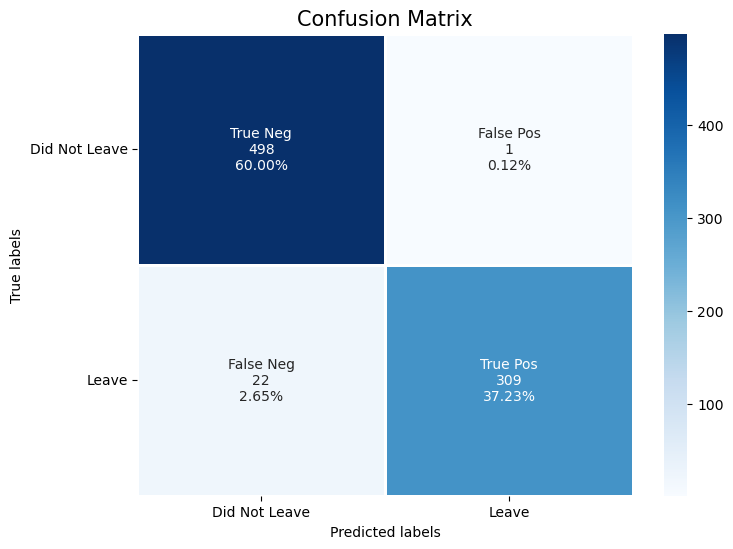

In [271]:
KNN = KNeighborsClassifier()  # Instantiate K-Nearest Neighbours model

parameters = {'n_neighbors': [5, 25],  # Define hyperparameters grid
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean']}

KNN_grid = GridSearchCV(KNN, param_grid=parameters, cv=5, scoring='f1').fit(x_train, y_train)  # Perform GridSearchCV for hyperparameter tuning

model(KNN_grid)  # Evaluate the model

print('The best parameters are: ', KNN_grid.best_params_)  # Print the best parameters found

model_classif(KNN_grid)  # Evaluate classification performance

## 4. Random Forest
In this section, we explore Random Forest, a learning algorithm widely used for classification tasks. Random Forest builds multiple decision trees during training and aggregates their predictions to improve accuracy and reduce overfitting. We first train Random Forest models with varying numbers of trees and plot the out-of-bag errors to determine the optimal number of trees. Then, we use GridSearchCV to further tune the model's hyperparameters, including the maximum number of features to consider for each split, maximum tree depth, and splitting criterion.

In [272]:
RandomFor = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=1)  # Instantiate Random Forest model
bag_list = list()  # Initialize a list to store out-of-bag errors
tree_list = [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500]  # Define a list of tree numbers to try

for n_trees in tree_list:
    RandomFor.set_params(n_estimators=n_trees)  # Set the number of trees
    print(f'Fitting model with {n_trees} trees')  # Print progress
    
    # Fit the model and calculate out-of-bag error
    RandomFor.fit(x_train, y_train)
    bag_error = 1 - RandomFor.oob_score_
    bag_list.append(pd.Series({'n_trees': n_trees, 'oob': bag_error}))  # Store out-of-bag error

# Create a DataFrame of out-of-bag errors for different numbers of trees
rf_oob_df = pd.concat(bag_list, axis=1).T.set_index('n_trees')
rf_oob_df

Fitting model with 15 trees
Fitting model with 20 trees
Fitting model with 30 trees
Fitting model with 40 trees


/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

/Users/fana/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 150 trees
Fitting model with 200 trees
Fitting model with 300 trees
Fitting model with 400 trees
Fitting model with 500 trees


oob
n_trees          
15.0     0.003619
20.0     0.000517
30.0     0.000000
40.0     0.000000
50.0     0.000000
100.0    0.000000
150.0    0.000000
200.0    0.000000
300.0    0.000000
400.0    0.000000
500.0    0.000000

[Text(0, 0.5, 'Out-of-Bag Error')]

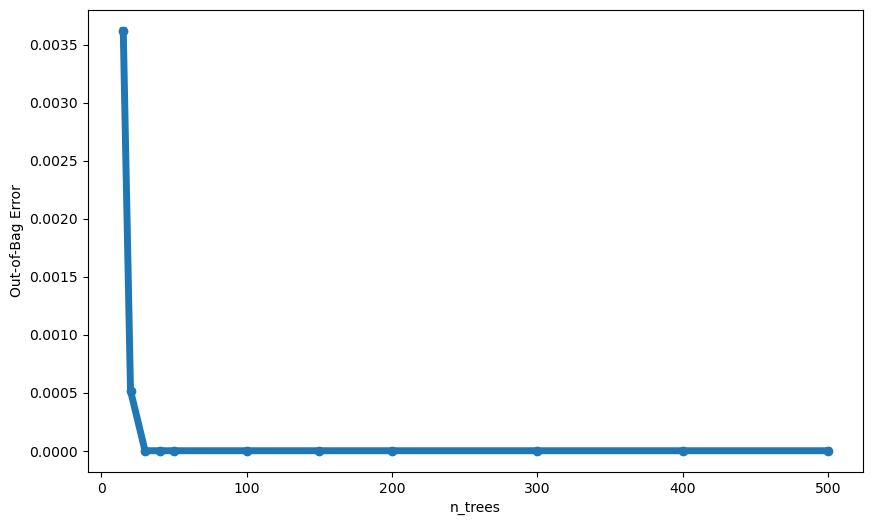

In [273]:
# Plot out-of-bag errors
axis = rf_oob_df.plot(legend=False, marker='o', figsize=(10, 6), linewidth=5)
axis.set(ylabel='Out-of-Bag Error')

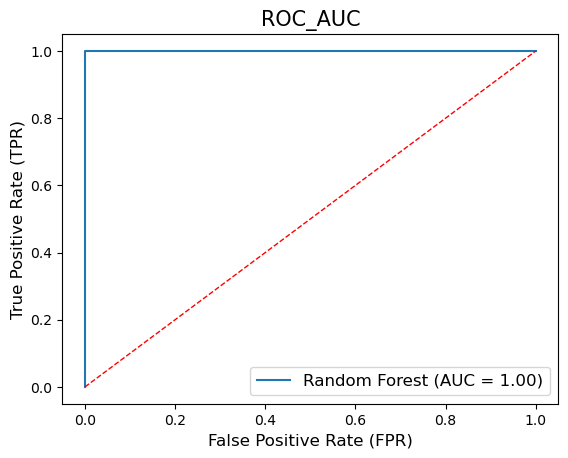

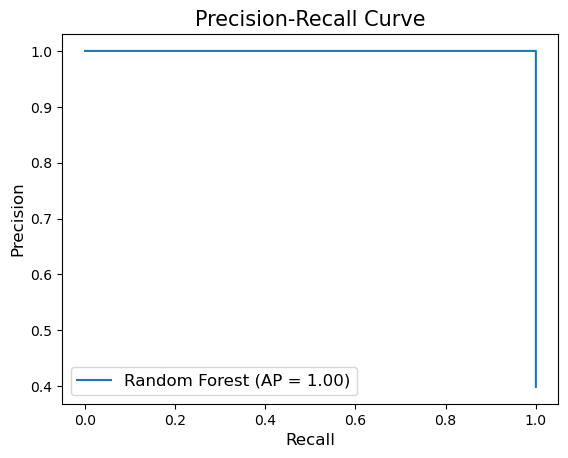

Random Forest
F1 Score:  1.0
ROC_AUC Score:  1.0
Accuracy:  1.0
The best parameters are:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       331

    accuracy                           1.00       830
   macro avg       1.00      1.00      1.00       830
weighted avg       1.00      1.00      1.00       830



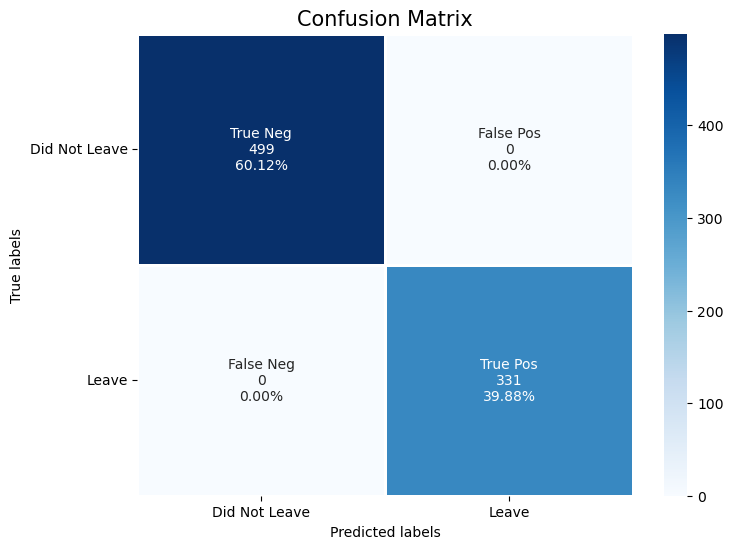

In [274]:
# Instantiate Random Forest model with optimized parameters
RdmForest = RandomForestClassifier(n_estimators=150, random_state=42)

# Define hyperparameters grid for further tuning
parameters = {'max_features': ['log2', 'sqrt'], 
              'max_depth': [4, 6, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Perform GridSearchCV for hyperparameter tuning
RdmForest_grid = GridSearchCV(RdmForest, param_grid=parameters, cv=5, scoring='f1').fit(x_train, y_train)

model(RdmForest_grid)  # Evaluate the model

print('The best parameters are: ', RdmForest_grid.best_params_)  # Print the best parameters found

model_classif(RdmForest_grid)  # Evaluate classification performance

### Feature Importance

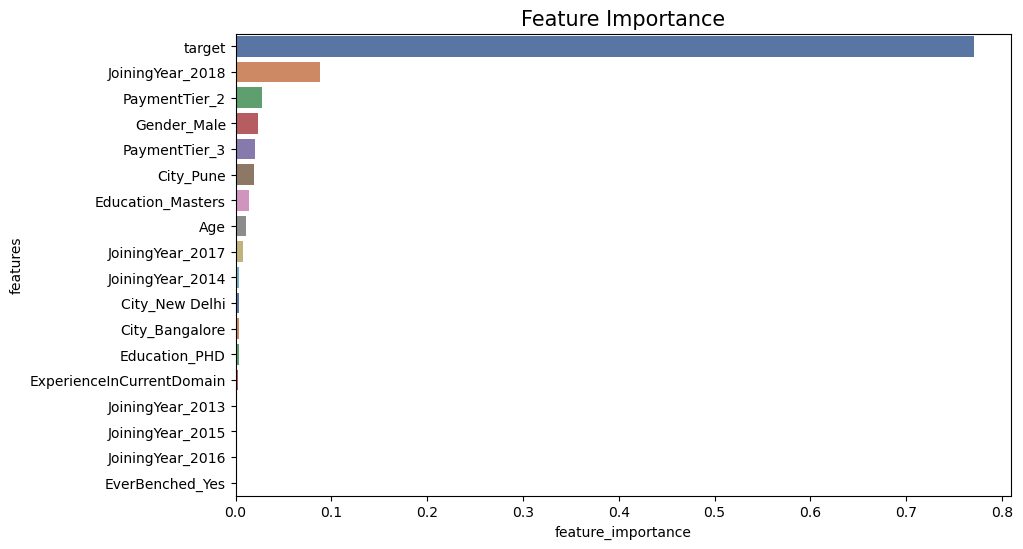

In [275]:
def featureimportance(columns, importances, n=20):
    # Create DataFrame with feature names and importances
    df = (pd.DataFrame({'features': columns,
                        'feature_importance': importances})
          .sort_values('feature_importance', ascending=False)
          .reset_index(drop=True))
    
    # Plot top n features based on importance scores
    plt.figure(figsize=(10, 6))
    sns.barplot(x='feature_importance',
                y='features',
                data=df[:n],
                orient='h', palette='deep')
    plt.title('Feature Importance', fontsize=15)

# Call the function to visualize feature importance
featureimportance(x_train.columns, RdmForest_grid.best_estimator_.feature_importances_)

### Evaluation

In [276]:
classifiers = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest']

# Predictions of each model
LogReg_grid_metrics = LogReg_grid.predict(x_test)
KNN_grid_metrics = KNN_grid.predict(x_test)
SVC_grid_metrics = SVC_grid.predict(x_test)
RdmForest_grid_metrics = RdmForest_grid.predict(x_test)

models = [LogReg_grid_metrics, KNN_grid_metrics, SVC_grid_metrics, RdmForest_grid_metrics]

In [277]:
# Predicted probabilities of each model
LogReg_grid_metrics_y_score = LogReg_grid.predict_proba(x_test)[:, 1]
KNN_grid_metrics_y_score = KNN_grid.predict_proba(x_test)[:, 1]
SVC_grid_metrics_y_score = SVC_grid.predict_proba(x_test)[:, 1]
RdmForest_grid_metrics_y_score = RdmForest_grid.predict_proba(x_test)[:, 1]
models_proba = [LogReg_grid_metrics_y_score, KNN_grid_metrics_y_score, SVC_grid_metrics_y_score, RdmForest_grid_metrics_y_score]

In [278]:
# Calculate AUC and F1 score for each model
auc_metrics = []
for prediction in models_proba:
    score = roc_auc_score(y_test, prediction)
    auc_metrics.append(round(score, 4))

f1_metrics = []
for prediction in models:
    score = f1_score(y_test, prediction)
    f1_metrics.append(round(score, 4))

# Calculate accuracy for each model
acc_metrics = []
for prediction in models:
    score = accuracy_score(y_test, prediction)
    acc_metrics.append(round(score, 4))

# Create DataFrame to store model evaluation metrics
model_metrics = pd.DataFrame({'Classifiers': classifiers, 'F1': f1_metrics, 'ROCAUC': auc_metrics, 'Accuracy': acc_metrics})
model_metrics = model_metrics.sort_values(by='F1', ascending=False).reset_index(drop=True)
round(model_metrics, 4)

Classifiers      F1  ROCAUC  Accuracy
0     Logistic Regression  1.0000  1.0000    1.0000
1  Support Vector Machine  1.0000  1.0000    1.0000
2           Random Forest  1.0000  1.0000    1.0000
3     K-Nearest Neighbors  0.9641  0.9956    0.9723

#### Observations:

- Logistic Regression had the highest F1 score of 1, indicating it achieved the best balance of precision and recall.

- Random Forest achieved the top ROC AUC of 1, showing it was best at distinguishing classes.

- Logistic Regression had the highest accuracy score of 1.

- Overall, Logistic Regression performed best according to the F1 and accuracy metrics, showing it classified samples most accurately. 